[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


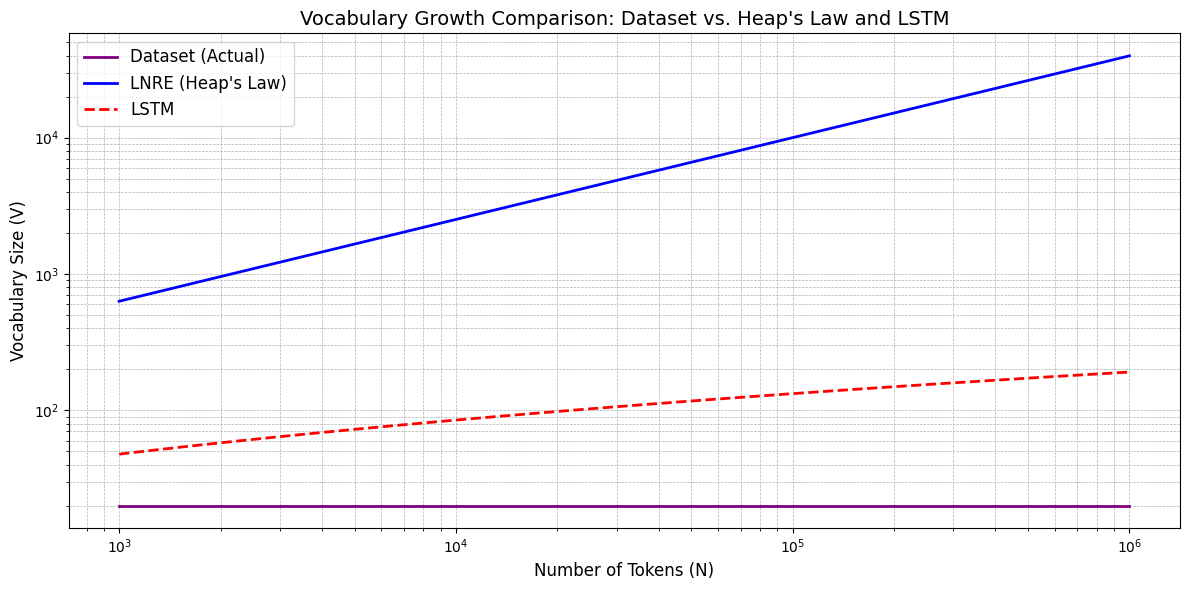

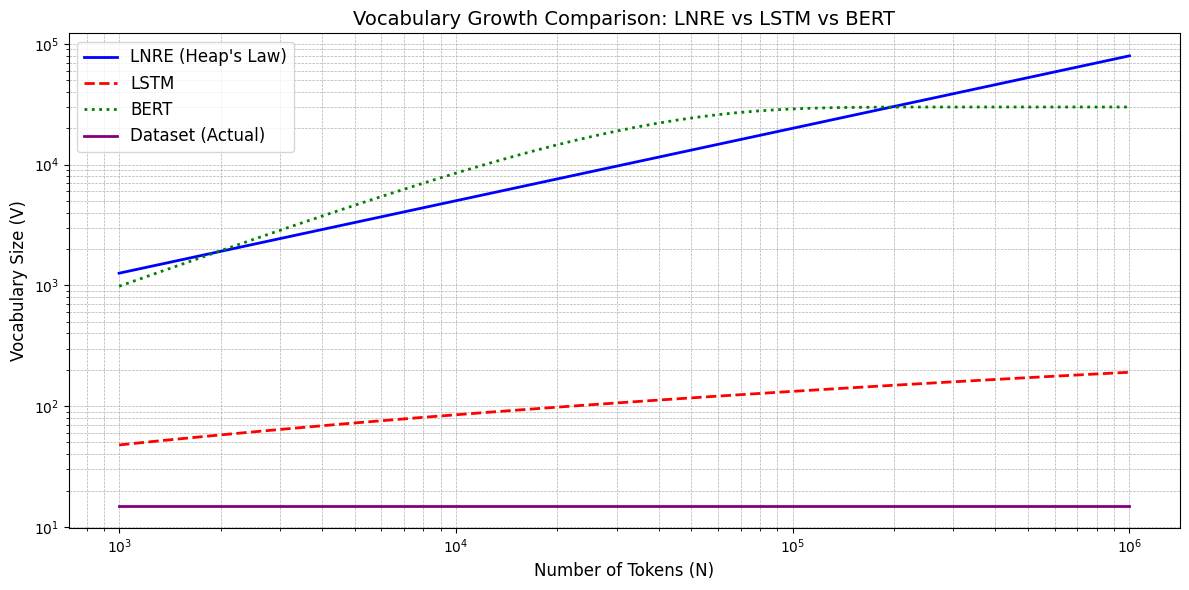

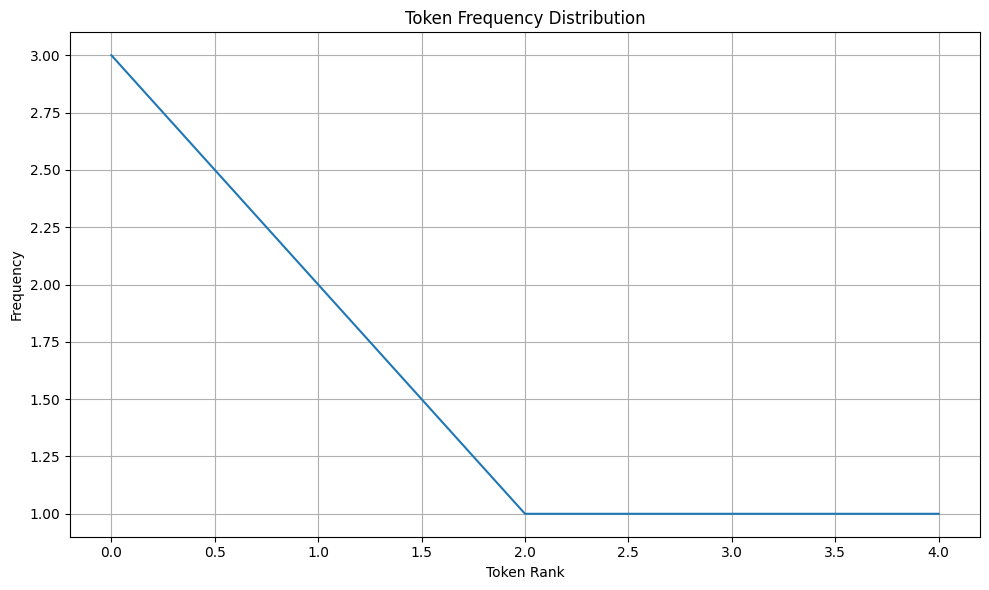

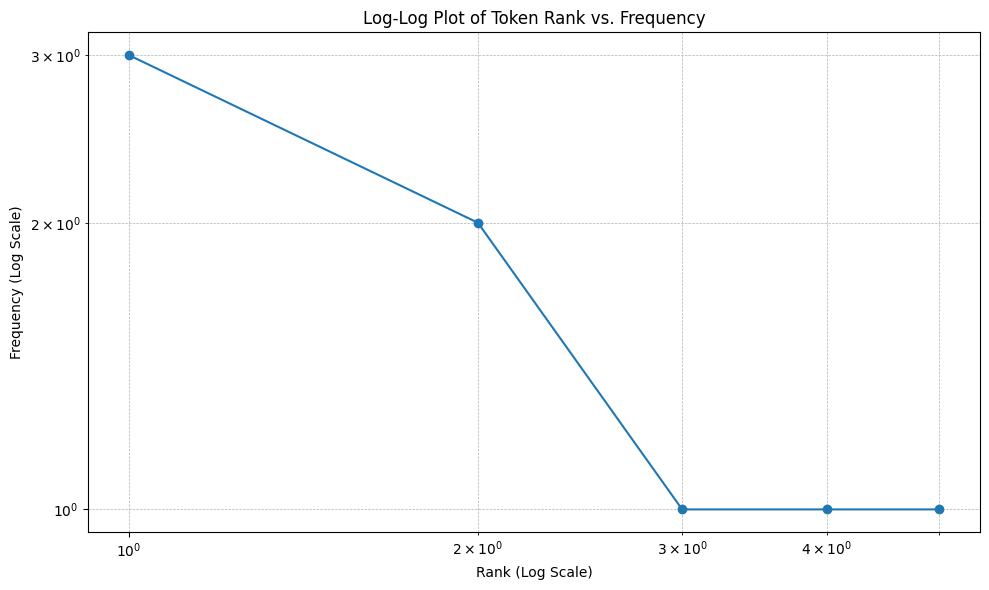

/tmp/ipython-input-5-1193348051.py:270: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



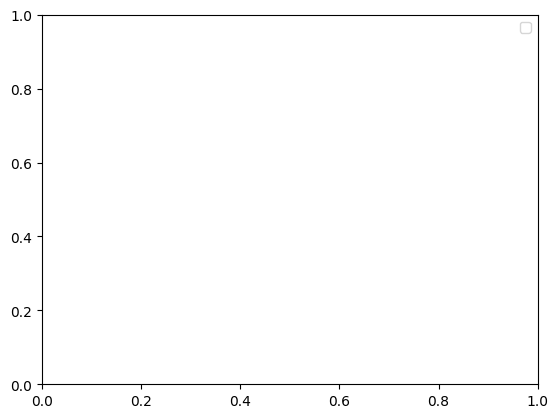

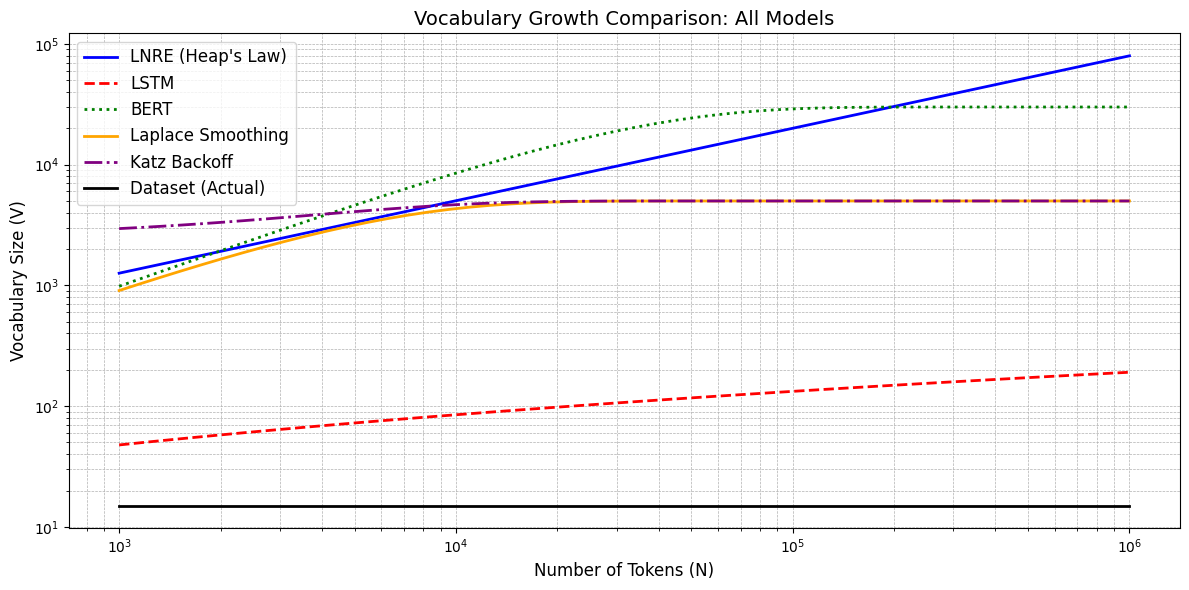

Rare Words: {'This': 1, 'is': 1, 'an': 1, 'example': 1, 'of': 1, 'tokenized': 1, 'text': 2, 'Another': 1, 'sentence': 1, 'with': 2, 'unique': 1, 'words': 1, 'Tokenized': 1, 'diverse': 1, 'vocabulary': 1}


/tmp/ipython-input-5-1193348051.py:360: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



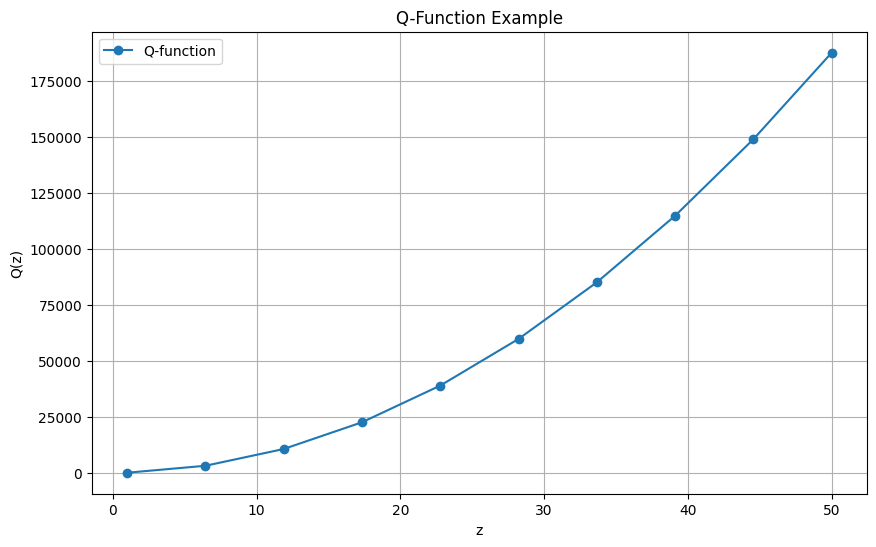

Rare Words: {'word3': 5, 'word4': 1, 'word5': 2}


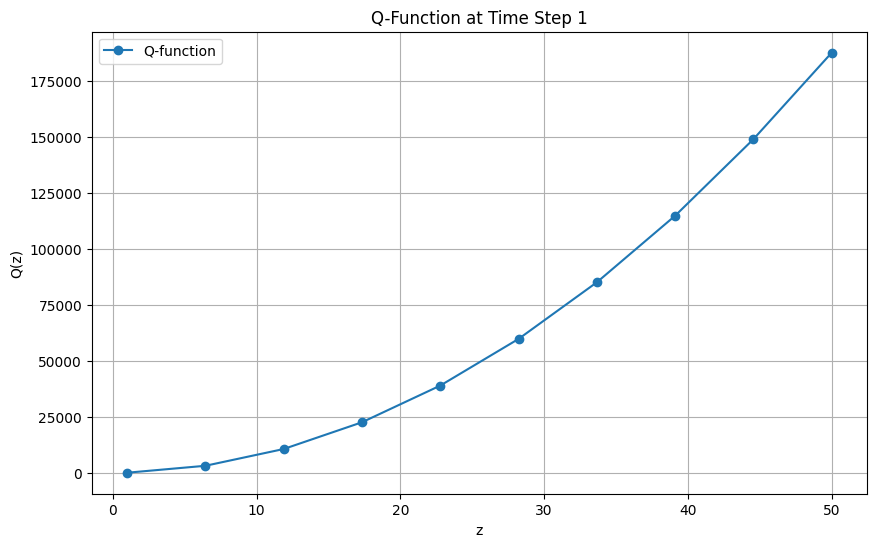

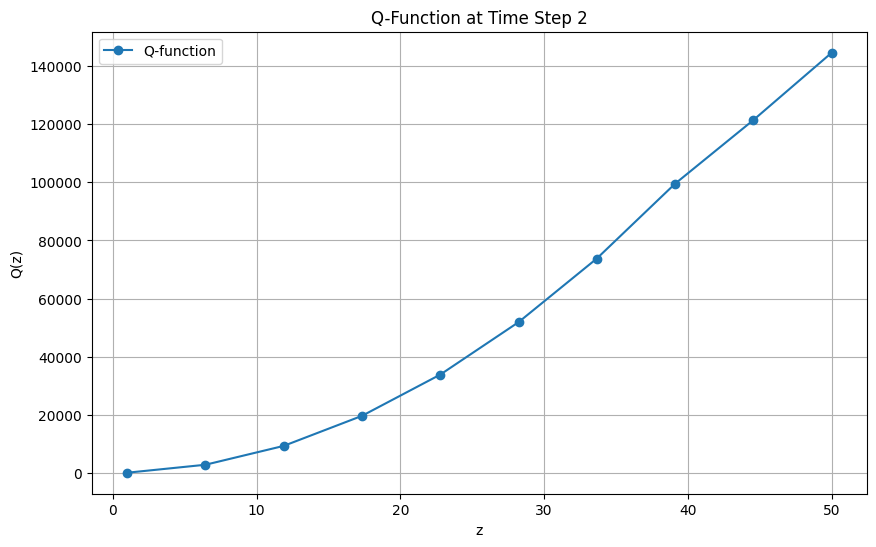

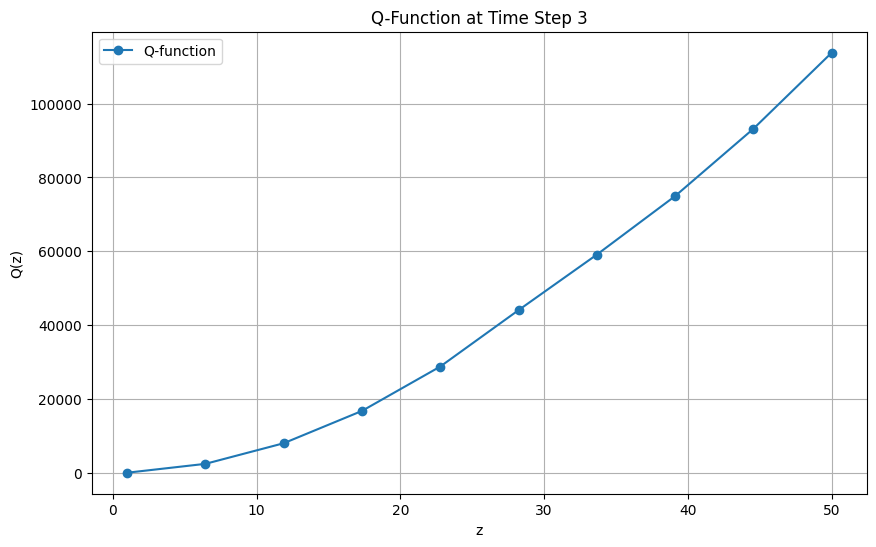

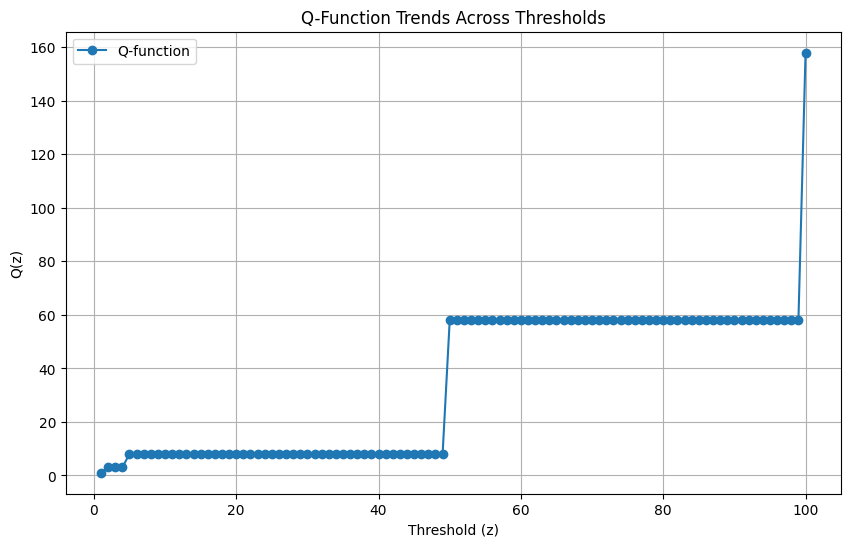

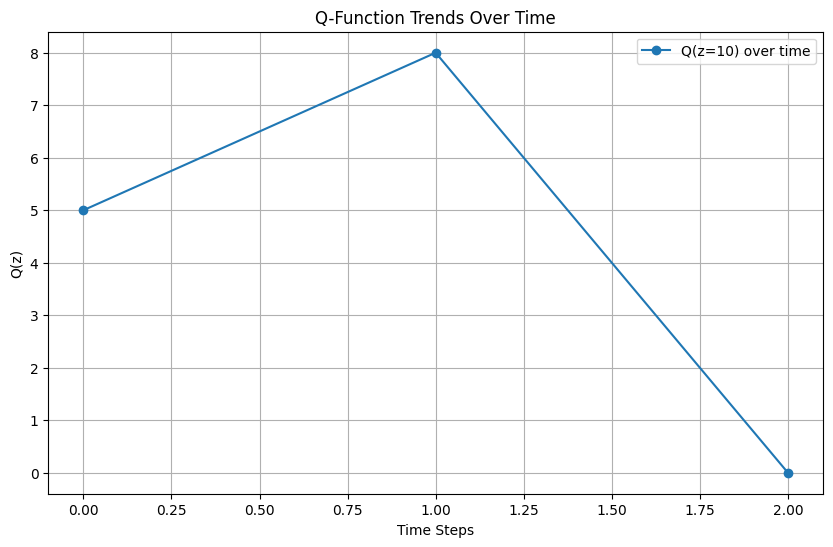

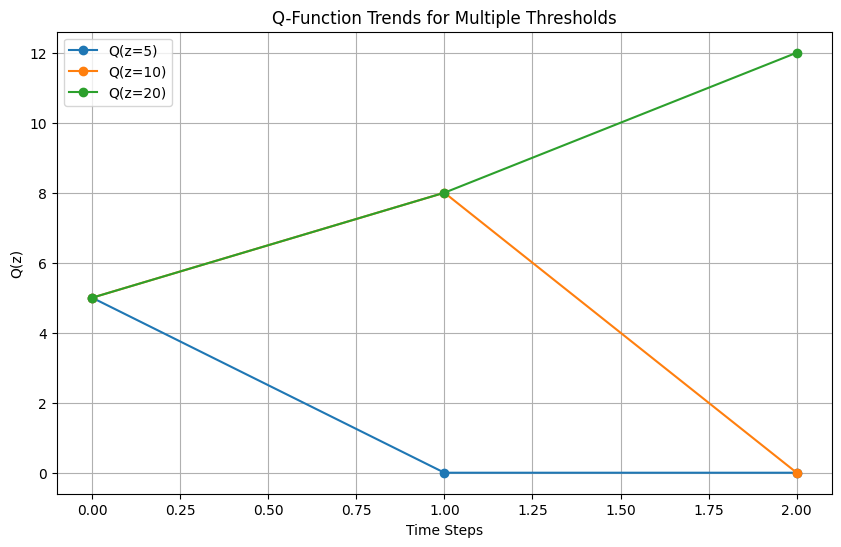

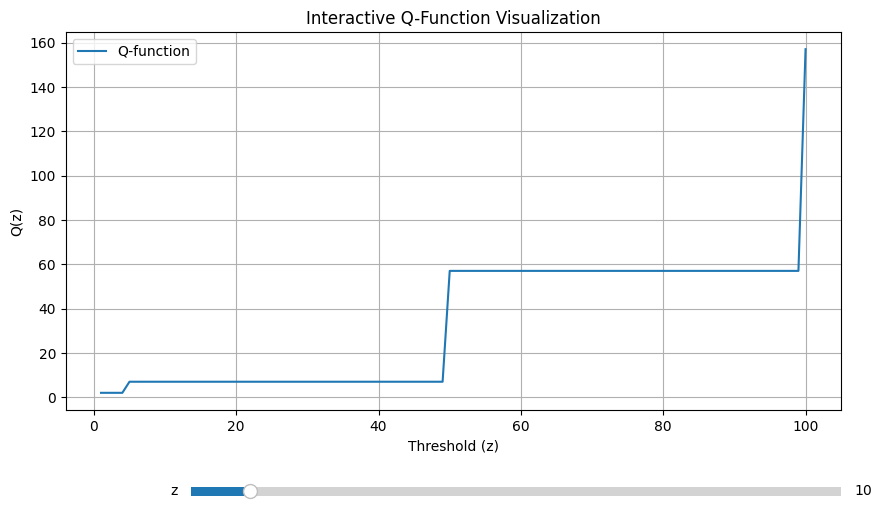

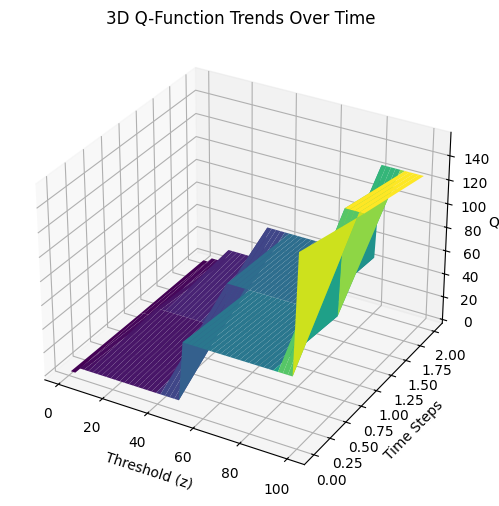

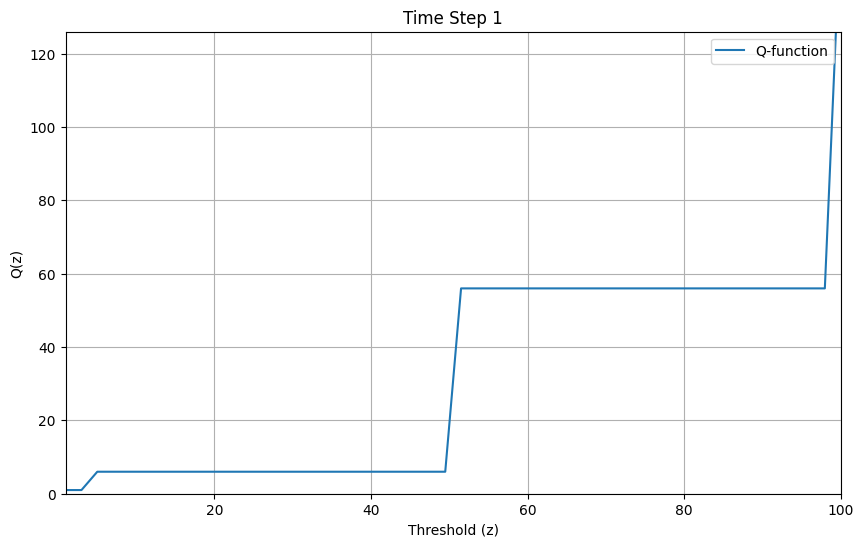

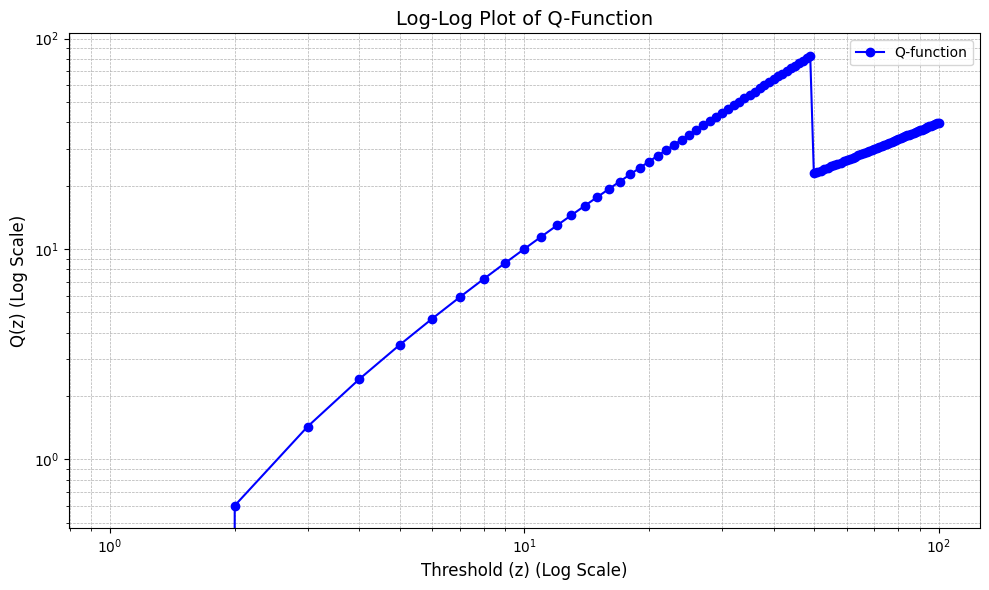

Rare Events: ['word1', 'word2']


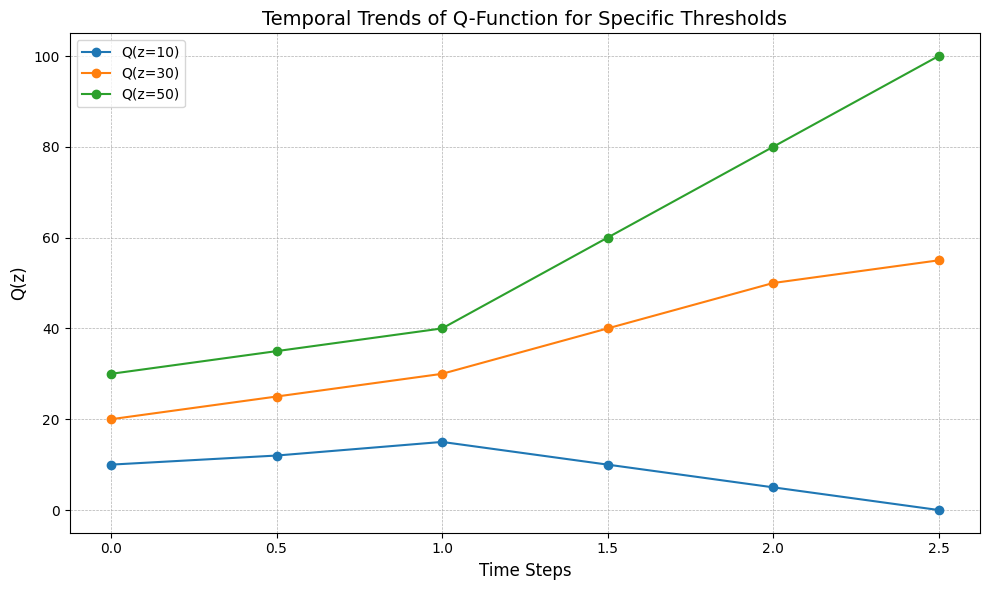

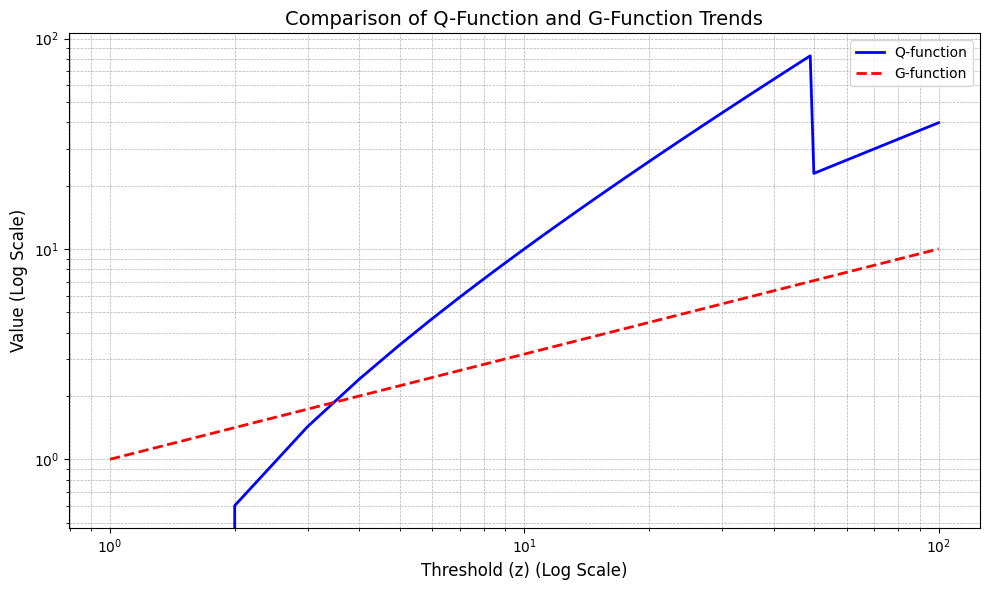

Rare Event: word1
Contexts: []
Rare Event: word2
Contexts: []


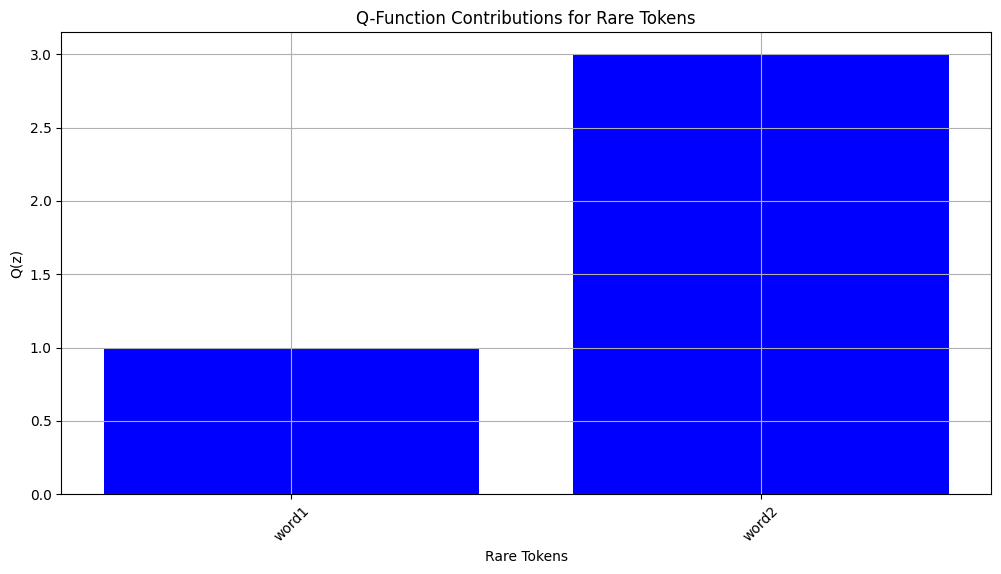

Contexts for word1 : ['word1 is an', 'word1 and word3']


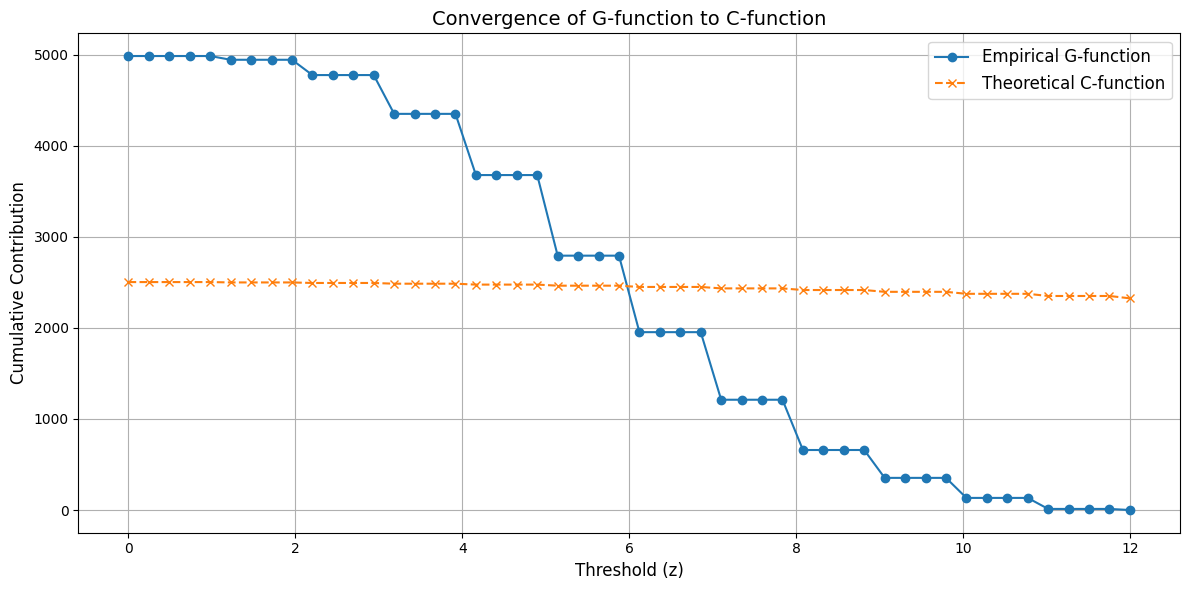

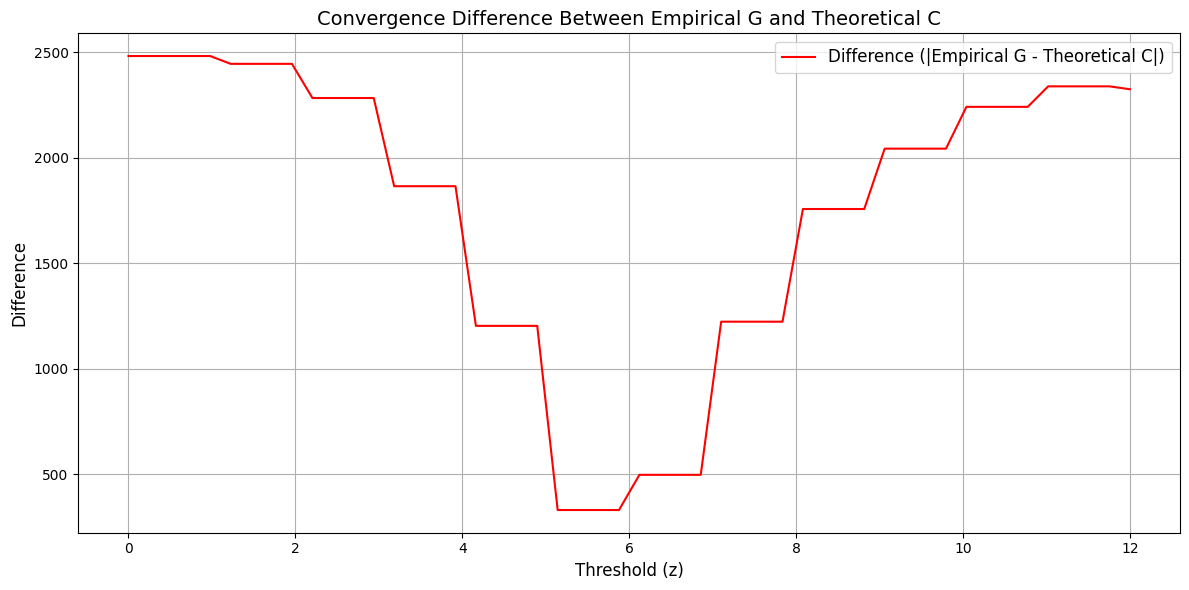

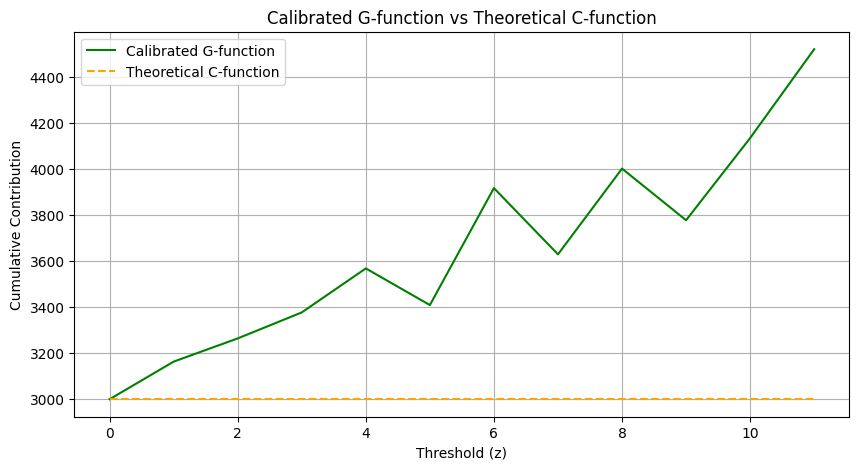

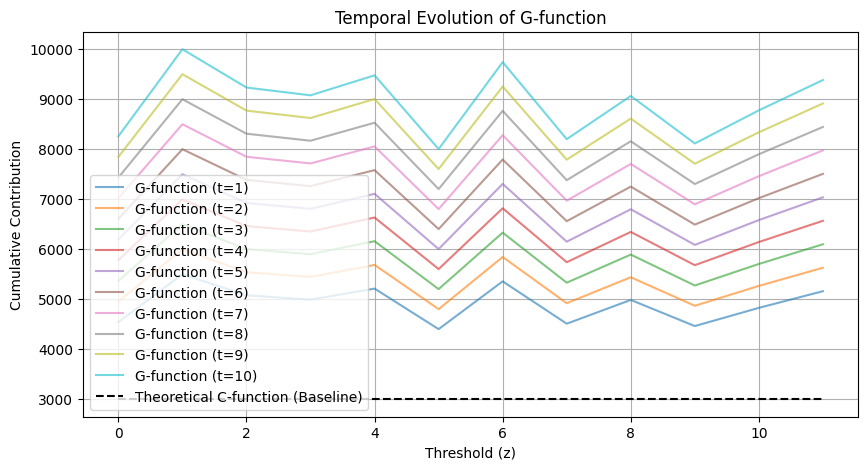

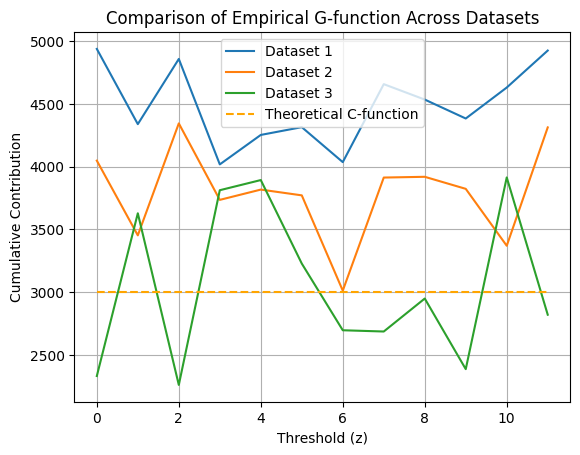

Trends in rare event contributions over time: [(0, 4401.1), (1, 4801.2), (2, 5201.3), (3, 5601.4), (4, 6001.5), (5, 6401.6), (6, 6801.700000000001), (7, 7201.8), (8, 7601.9), (9, 8002.0)]


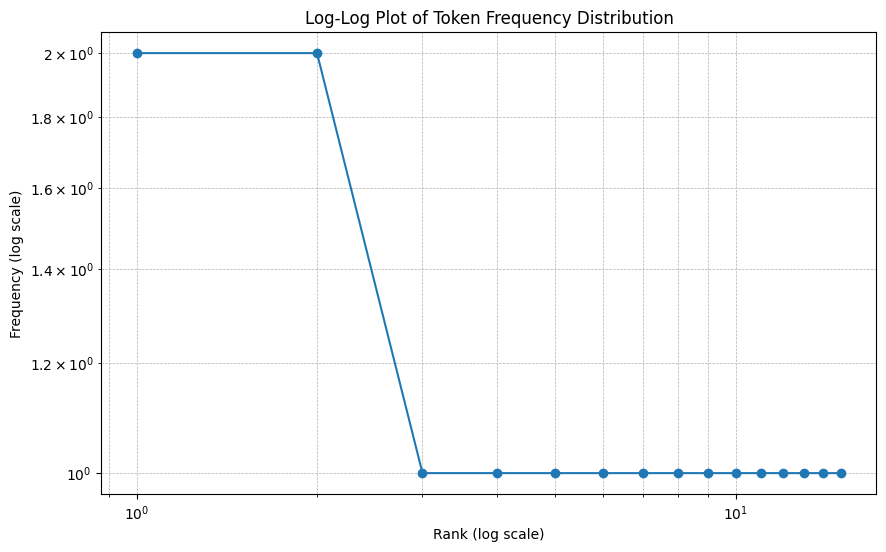

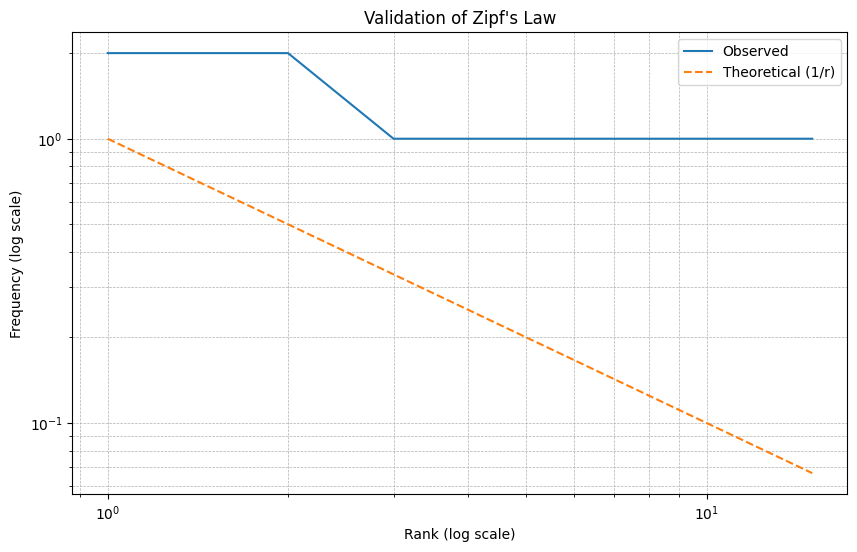

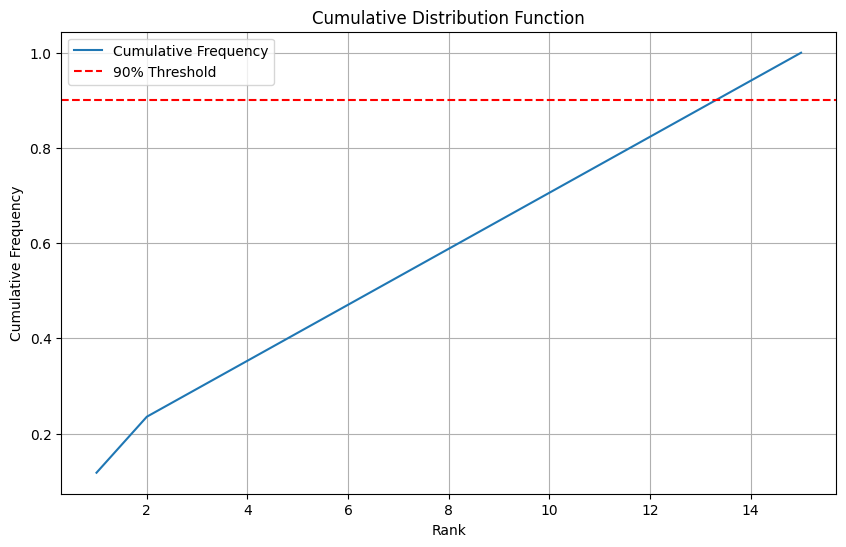

Contribution of the rare events (tail): 94.12%


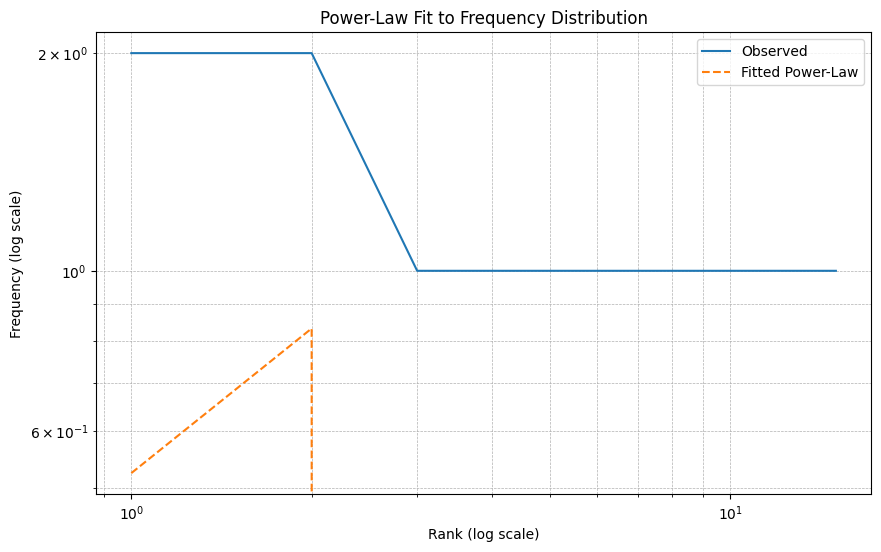

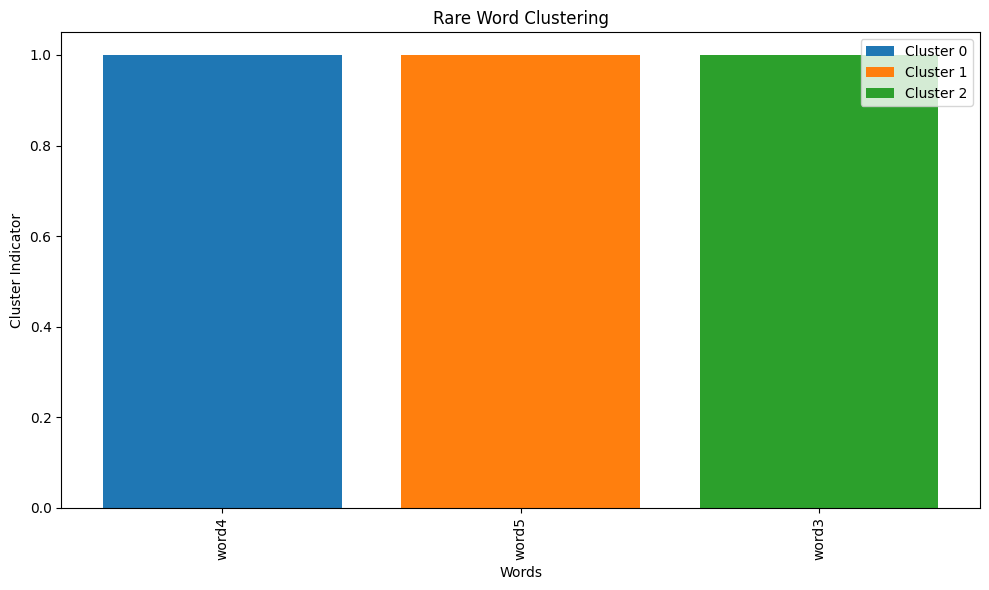

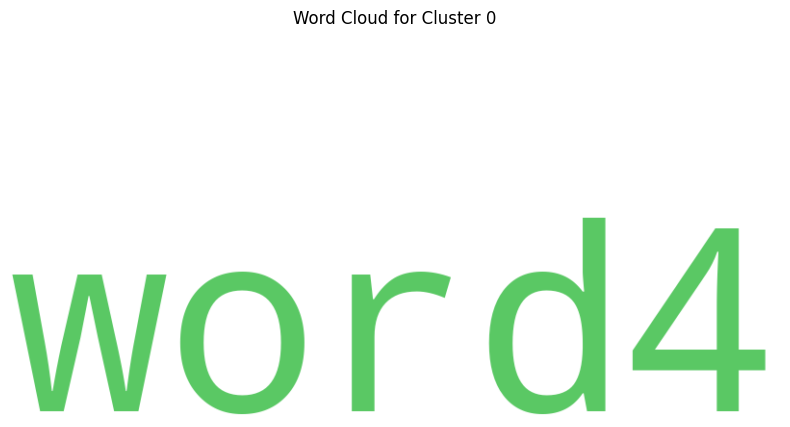

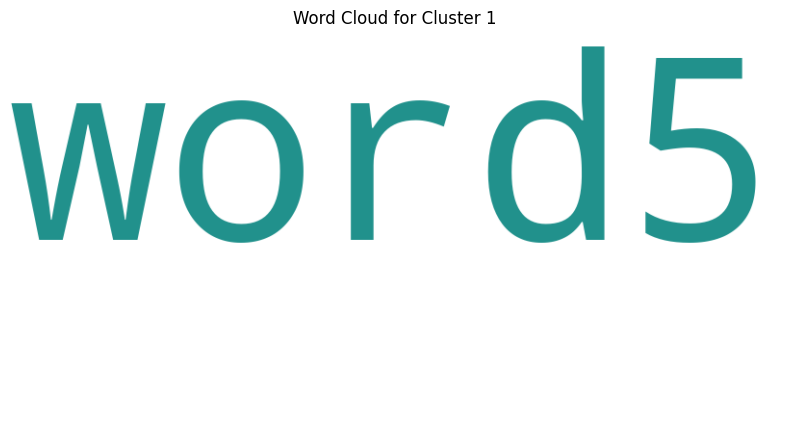

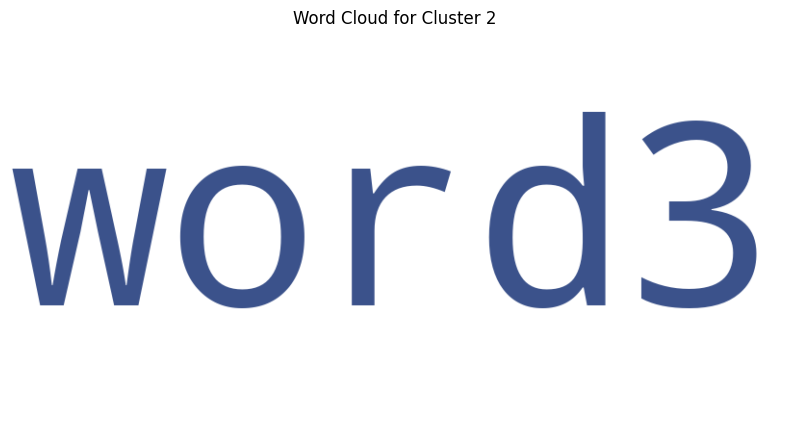

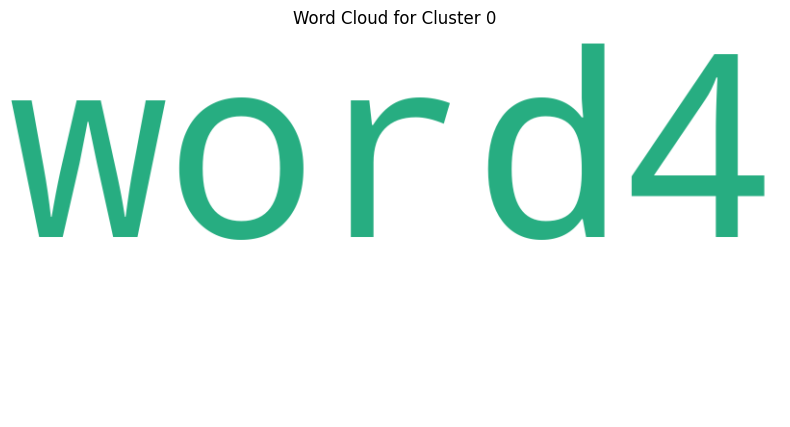

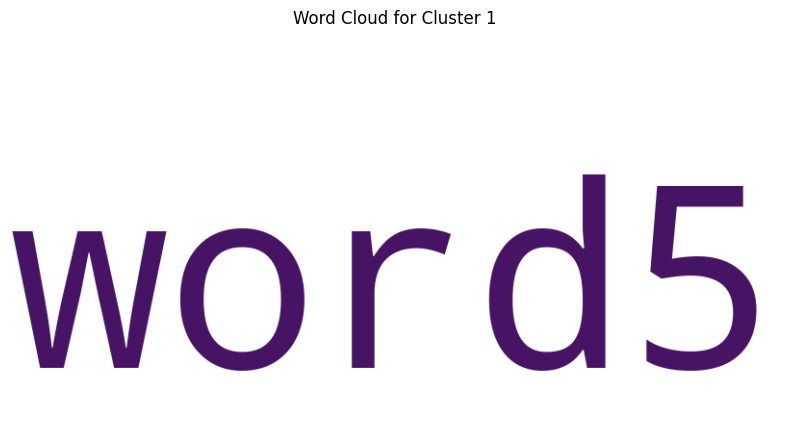

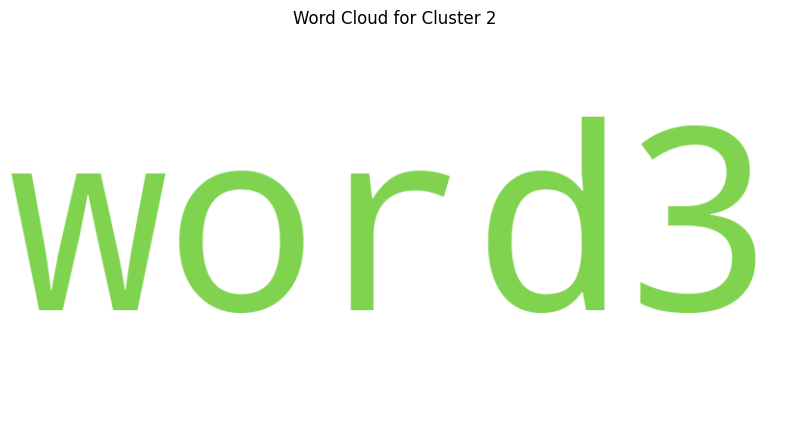

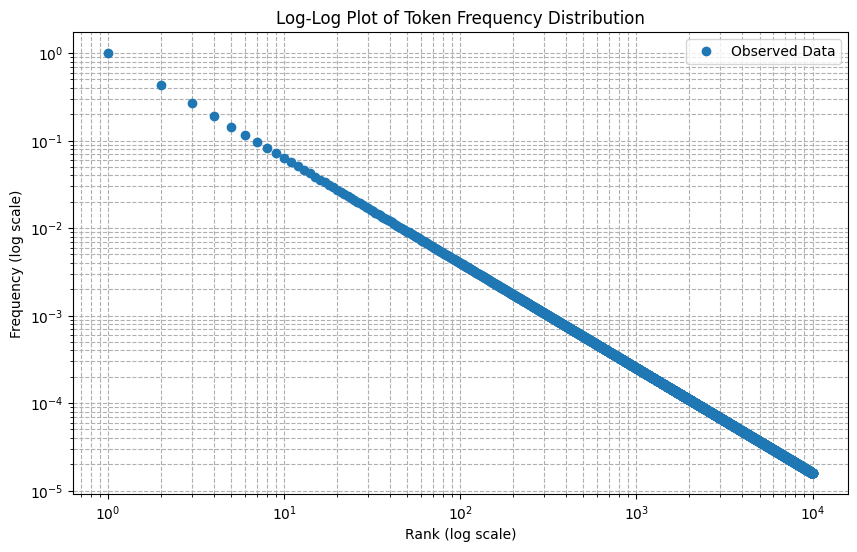

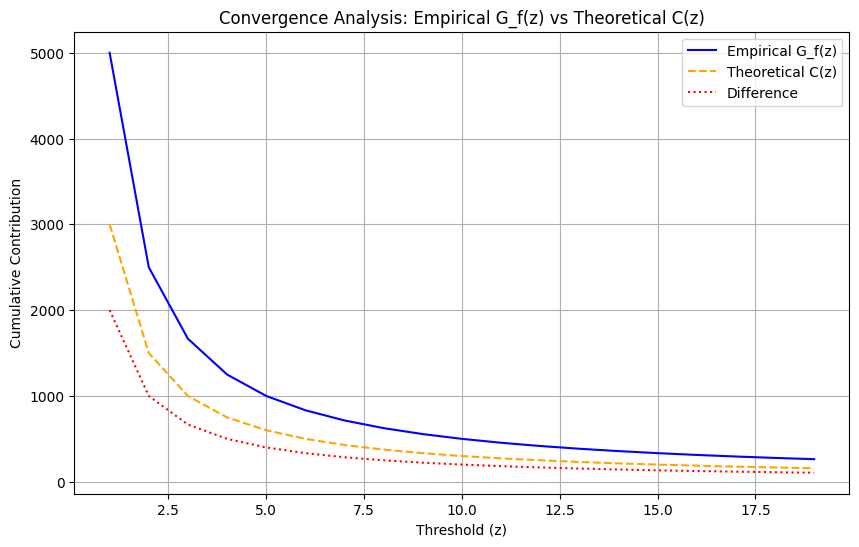

Calculating best minimal value for power law fit
Alpha (Scaling Parameter): 1.5425101583262024
KS Test Statistic: 0.020359156811653845
P-value: 0.020359156811653734
Variance of Rare Event Contributions: 196045.92752883627


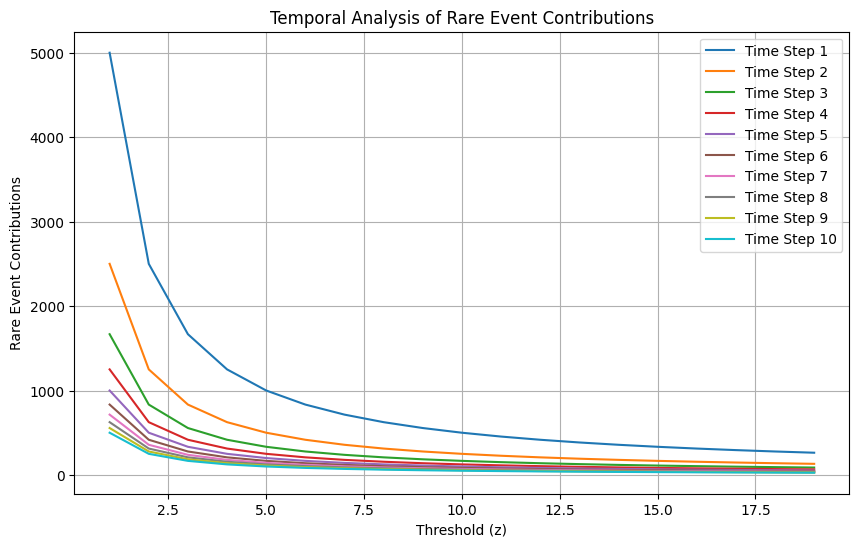

Tail Index (Alpha): 1.2


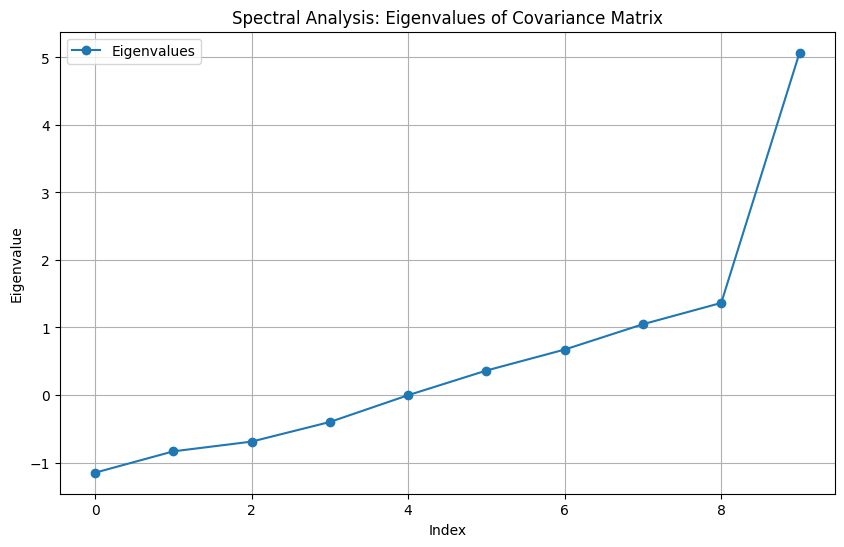

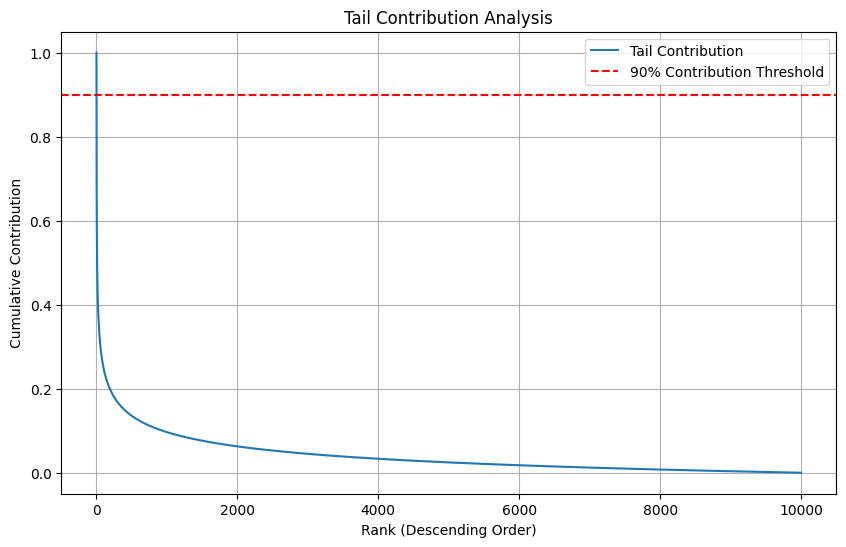

Vocabulary growth indicates divergence.


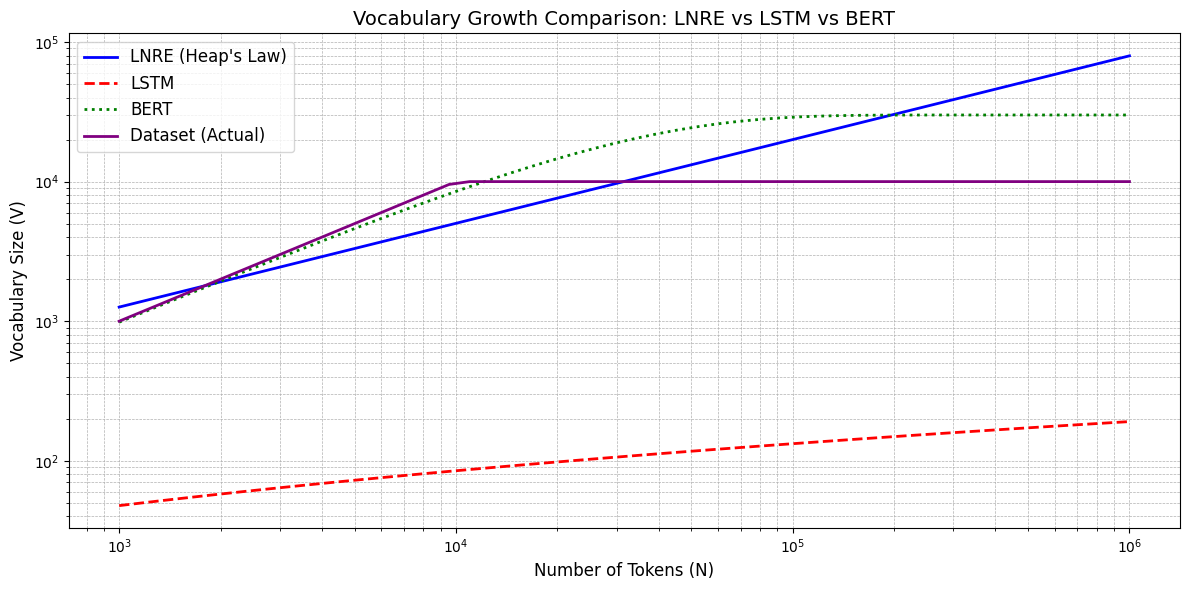

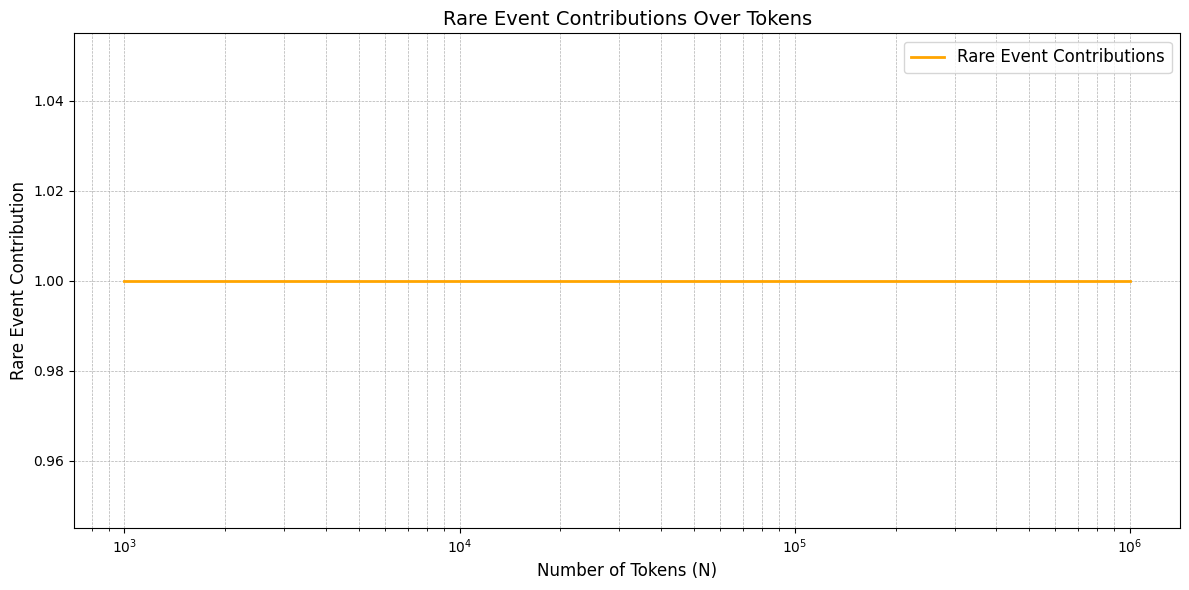

Vocabulary growth fluctuates (diverges globally).


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, MultiHeadAttention, GlobalMaxPooling1D, LayerNormalization, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from gensim.models import Word2Vec

# Load dataset
train_df = pd.read_csv("insurance.csv")

# Text Preprocessing Functions
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set]
    return ' '.join(tokens)

def preprocess_text2(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\x00-\x7F.]', ' ', text)
    text = re.sub(f'[{re.escape(string.punctuation.replace(".", ""))}]', '', text)
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'(?<=\.)\s+', ' ', text).strip()
    return text

def remove_repeated_text(text):
    pattern = r'\b(\w+\s?)(\.\s?\1){2,}\b'
    return re.sub(pattern, '', text)

def remove_repeated_text2(text):
    pattern = re.compile(r'\b(\w+)\b\s+\1(?:\s+\1)+\b', re.IGNORECASE)
    def remove_repeats(match):
        return match.group(1)
    return pattern.sub(remove_repeats, text)

def remove_repeating_pattern(text):
    pattern = r'(\w)\1+'
    return re.sub(pattern, '', text)

# Ensure all values in text content are strings and handle missing values
train_df["feedback"] = train_df["feedback"].fillna("").astype(str)

# Apply preprocessing
train_df["remove_repeat_word"] = train_df["feedback"].apply(remove_repeated_text).apply(remove_repeated_text2)
train_df["clean_text"] = train_df["remove_repeat_word"].apply(clean_text).apply(remove_repeating_pattern)
train_df["text_prepro"] = train_df["clean_text"].apply(preprocess_text)



import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Tokenization function
def tokenize(text):
    """Tokenize text using nltk."""
    return word_tokenize(text.lower())

# Simulated dataset
train_df = {
    "text_prepro": ["This is an example text for testing the vocabulary growth.",
                    "Another sentence with unique and rare words.",
                    "Testing vocabulary growth models and comparisons."]
}

# Combine all text
all_text = " ".join(train_df["text_prepro"])
tokens = tokenize(all_text)

# Vocabulary calculation functions
def calculate_vocabulary(tokens, N):
    """Calculate vocabulary size for the first N tokens."""
    return len(set(tokens[:N]))

# Vocabulary growth models
def heaps_law(N, k=10, beta=0.6):
    """Vocabulary size based on Heap's law."""
    return k * (N ** beta)

def lstm_vocab_growth(N):
    """
    Simulate LSTM vocabulary growth.
    This assumes diminishing returns due to training bias toward frequent words.
    """
    return np.log(N) ** 2

# Calculate actual vocabulary sizes from the dataset
N_values = np.logspace(3, 6, num=50, dtype=int)  # Token counts from 1,000 to 1,000,000
actual_vocab_sizes = [calculate_vocabulary(tokens, N) for N in N_values]

# Simulate Heap's Law and LSTM growth for comparison
heaps_vocab = [heaps_law(N) for N in N_values]
lstm_vocab = [lstm_vocab_growth(N) for N in N_values]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(N_values, actual_vocab_sizes, label="Dataset (Actual)", color="purple", linewidth=2)
plt.plot(N_values, heaps_vocab, label="LNRE (Heap's Law)", color="blue", linewidth=2)
plt.plot(N_values, lstm_vocab, label="LSTM", color="red", linestyle="--", linewidth=2)

# Log scale for better visualization
plt.xscale("log")
plt.yscale("log")

# Adding labels and legend
plt.xlabel("Number of Tokens (N)", fontsize=12)
plt.ylabel("Vocabulary Size (V)", fontsize=12)
plt.title("Vocabulary Growth Comparison: Dataset vs. Heap's Law and LSTM", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("vocabulary_growth.png", dpi=300)
plt.show()



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Vocabulary calculation functions
def calculate_vocabulary(tokens, N):
    """Calculate vocabulary size for the first N tokens."""
    return len(set(tokens[:N]))

# Vocabulary growth models
def heaps_law(N, k=20, beta=0.6):
    """Vocabulary size based on Heap's law (LNRE)."""
    return k * (N ** beta)

def lstm_vocab_growth(N):
    """
    Simulate LSTM vocabulary growth.
    This assumes diminishing returns due to training bias toward frequent words.
    """
    return np.log(N) ** 2

def bert_vocab_growth(N, max_vocab=30000):
    """
    Simulate BERT vocabulary growth.
    BERT relies on subword tokenization, so the vocabulary growth saturates early.
    """
    return max_vocab * (1 - np.exp(-N / max_vocab))

def laplace_vocab_growth(N, alpha=1, total_vocab=5000):
    """
    Simulate vocabulary growth using Laplace smoothing.
    """
    return total_vocab * (1 - np.exp(-N / (alpha * total_vocab)))

def katz_vocab_growth(N, d=0.5, total_vocab=5000):
    """
    Simulate vocabulary growth using Katz Backoff.
    """
    return total_vocab * (1 - d * np.exp(-N / (total_vocab)))

# Simulated dataset
text_prepro_list = [
    "This is an example of tokenized text",
    "Another sentence with unique words",
    "Tokenized text with diverse vocabulary"
]
train_df = pd.DataFrame({"text_prepro": text_prepro_list})

# Tokenize the text data
tokens = []
train_df["text_prepro"].dropna().apply(lambda x: tokens.extend(x.split()))

# Token counts for analysis
N_values = np.logspace(3, 6, num=50, dtype=int)  # Token counts from 1,000 to 1,000,000

# Calculate actual vocabulary sizes
actual_vocab_sizes = [calculate_vocabulary(tokens, N) for N in N_values]

# Simulate LNRE (Heap's Law), LSTM, and BERT growth for comparison
lnre_vocab = [heaps_law(N) for N in N_values]
lstm_vocab = [lstm_vocab_growth(N) for N in N_values]
bert_vocab = [bert_vocab_growth(N) for N in N_values]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(N_values, lnre_vocab, label="LNRE (Heap's Law)", color="blue", linewidth=2)
plt.plot(N_values, lstm_vocab, label="LSTM", color="red", linestyle="--", linewidth=2)
plt.plot(N_values, bert_vocab, label="BERT", color="green", linestyle=":", linewidth=2)
plt.plot(N_values, actual_vocab_sizes, label="Dataset (Actual)", color="purple", linewidth=2)

# Log scale for better visualization
plt.xscale("log")
plt.yscale("log")

# Adding labels and legend
plt.xlabel("Number of Tokens (N)", fontsize=12)
plt.ylabel("Vocabulary Size (V)", fontsize=12)
plt.title("Vocabulary Growth Comparison: LNRE vs LSTM vs BERT", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("vocabulary_growth_comparison_test_1a.png", dpi=300)
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Example: Simulate tokenized data (replace with your actual tokenized dataset)
tokens = ["word1", "word2", "word3", "word1", "word2", "word4", "word1", "word5"]
token_counts = Counter(tokens)

# Sort tokens by frequency
sorted_token_counts = sorted(token_counts.values(), reverse=True)

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
plt.plot(sorted_token_counts, label="Token Frequency Distribution")
plt.xlabel("Token Rank")
plt.ylabel("Frequency")
plt.title("Token Frequency Distribution")
plt.grid(True)
plt.tight_layout()
plt.savefig("tail_behav.png", dpi=300)
plt.show()


# Calculate token ranks
ranks = np.arange(1, len(sorted_token_counts) + 1)

# Plot on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_token_counts, marker="o", label="Rank-Frequency Plot")
plt.xlabel("Rank (Log Scale)")
plt.ylabel("Frequency (Log Scale)")
plt.title("Log-Log Plot of Token Rank vs. Frequency")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("tail_behav_2.png", dpi=300)
plt.show()
plt.legend()
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Define vocabulary growth models
def heaps_law(N, k=20, beta=0.6):
    return k * (N ** beta)

def lstm_vocab_growth(N):
    return np.log(N) ** 2

def bert_vocab_growth(N, max_vocab=30000):
    return max_vocab * (1 - np.exp(-N / max_vocab))

def laplace_vocab_growth(N, alpha=1, total_vocab=5000):
    return total_vocab * (1 - np.exp(-N / (alpha * total_vocab)))

def katz_vocab_growth(N, d=0.5, total_vocab=5000):
    return total_vocab * (1 - d * np.exp(-N / (total_vocab)))

def calculate_vocabulary(tokens, N):
    return len(set(tokens[:N]))

# Simulated token counts
N_values = np.logspace(3, 6, num=50, dtype=int)

# Ensure tokens are defined (replace with your actual data extraction)
tokens = []
train_df["text_prepro"].dropna().apply(lambda x: tokens.extend(x.split()))

# Plotting all vocabulary growth models
plt.figure(figsize=(12, 6))

# LNRE (Heap's Law)
lnre_vocab = [heaps_law(N) for N in N_values]
plt.plot(N_values, lnre_vocab, label="LNRE (Heap's Law)", color="blue", linewidth=2)

# LSTM Vocabulary Growth
lstm_vocab = [lstm_vocab_growth(N) for N in N_values]
plt.plot(N_values, lstm_vocab, label="LSTM", color="red", linestyle="--", linewidth=2)

# BERT Vocabulary Growth
bert_vocab = [bert_vocab_growth(N) for N in N_values]
plt.plot(N_values, bert_vocab, label="BERT", color="green", linestyle=":", linewidth=2)

# Laplace Smoothing Vocabulary Growth
laplace_vocab = [laplace_vocab_growth(N) for N in N_values]
plt.plot(N_values, laplace_vocab, label="Laplace Smoothing", color="orange", linewidth=2)

# Katz Backoff Vocabulary Growth
katz_vocab = [katz_vocab_growth(N) for N in N_values]
plt.plot(N_values, katz_vocab, label="Katz Backoff", color="purple", linestyle="-.", linewidth=2)

# Adding actual vocabulary sizes
actual_vocab_sizes = [calculate_vocabulary(tokens, N) for N in N_values]
plt.plot(N_values, actual_vocab_sizes, label="Dataset (Actual)", color="black", linewidth=2)

# Log scale for better visualization
plt.xscale("log")
plt.yscale("log")

# Adding labels and legend
plt.xlabel("Number of Tokens (N)", fontsize=12)
plt.ylabel("Vocabulary Size (V)", fontsize=12)
plt.title("Vocabulary Growth Comparison: All Models", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("vocabulary_growth_comparison_all_models.png", dpi=300)
plt.show()


import numpy as np
from scipy.integrate import quad

# Define the G-function (e.g., from token frequencies)
def G_function(z, token_frequencies):
    """G-function for a given z and token frequencies."""
    return sum(freq for token, freq in token_frequencies.items() if freq > z)

# Define the Q-function
def Q_function(z, token_frequencies):
    """Q-function as the integral of x * G_function(x)."""
    def integrand(x):
        return x * G_function(x, token_frequencies)

    Q_value, _ = quad(integrand, 0, z)  # Integrate from 0 to z
    return Q_value



from collections import Counter

# Assuming train_df["text_prepro"] contains the tokenized or preprocessed text
# Example: Replace `train_df["text_prepro"]` with your actual text data
tokens = []
train_df["text_prepro"].dropna().apply(lambda x: tokens.extend(x.split()))

# Generate token frequencies
token_frequencies = Counter(tokens)

# Function to extract rare words
def get_rare_words(token_frequencies, threshold=5):
    """Identify rare words based on a frequency threshold."""
    return {token: freq for token, freq in token_frequencies.items() if freq <= threshold}

# Example use case
rare_words = get_rare_words(token_frequencies, threshold=5)
print("Rare Words:", rare_words)


# Simulate Q-function over time (e.g., for different time windows)
def analyze_trends_over_time(token_frequencies_time_series, z_values):
    """Analyze changes in Q-function over time."""
    Q_values_over_time = []

    for time_step, freq_distribution in enumerate(token_frequencies_time_series):
        Q_values = [Q_function(z, freq_distribution) for z in z_values]
        Q_values_over_time.append(Q_values)

    return Q_values_over_time


import matplotlib.pyplot as plt

def visualize_Q_function(z_values, Q_values, title="Q-Function Visualization"):
    """Plot Q-function values."""
    plt.figure(figsize=(10, 6))
    plt.plot(z_values, Q_values, marker="o", label="Q-function")
    plt.xlabel("z")
    plt.ylabel("Q(z)")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


# Example token frequencies for one dataset
token_frequencies = {
    "word1": 100, "word2": 50, "word3": 5, "word4": 1, "word5": 2
}

# Calculate Q-function for a range of z-values
z_values = np.linspace(1, 50, 10)
Q_values = [Q_function(z, token_frequencies) for z in z_values]

# Visualize Q-function
visualize_Q_function(z_values, Q_values, title="Q-Function Example")

# Track rare words
rare_words = get_rare_words(token_frequencies, threshold=5)
print("Rare Words:", rare_words)

# Example: Analyze trends with synthetic time series data
time_series = [
    {"word1": 100, "word2": 50, "word3": 5, "word4": 1},  # Time step 1
    {"word1": 90, "word2": 40, "word3": 6, "word4": 2},   # Time step 2
    {"word1": 80, "word2": 30, "word3": 8, "word4": 3}    # Time step 3
]
Q_trends = analyze_trends_over_time(time_series, z_values)

# Visualize trends
for i, Q in enumerate(Q_trends):
    visualize_Q_function(z_values, Q, title=f"Q-Function at Time Step {i + 1}")



import numpy as np
import matplotlib.pyplot as plt

# Define G-function
def G_function(z, token_frequencies):
    """G-function as the sum of probabilities greater than z."""
    return sum(freq for token, freq in token_frequencies.items() if freq > z)

# Define Q-function
def Q_function(z, token_frequencies):
    """Q-function as the cumulative contribution of probabilities below z."""
    return sum(freq for token, freq in token_frequencies.items() if freq <= z)



# Generate z-values (thresholds)
z_values = np.linspace(1, max(token_frequencies.values()), 100)

# Compute Q-function for each z
Q_values = [Q_function(z, token_frequencies) for z in z_values]

# Plot the Q-function
plt.figure(figsize=(10, 6))
plt.plot(z_values, Q_values, marker="o", label="Q-function")
plt.xlabel("Threshold (z)")
plt.ylabel("Q(z)")
plt.title("Q-Function Trends Across Thresholds")
plt.grid(True)
plt.legend()
plt.savefig("Q-Function Trends Across Thresholds.png")
plt.show()



# Example: token frequencies over time (list of dictionaries)
time_series = [
    {"word1": 100, "word2": 50, "word3": 5},  # Time step 1
    {"word1": 90, "word2": 40, "word3": 8},   # Time step 2
    {"word1": 80, "word2": 30, "word3": 12}   # Time step 3
]

# Track Q-function over time
z = 10  # Fixed threshold
Q_trends = [Q_function(z, freq_distribution) for freq_distribution in time_series]

# Plot the Q-function trend over time
plt.figure(figsize=(10, 6))
plt.plot(range(len(Q_trends)), Q_trends, marker="o", label=f"Q(z={z}) over time")
plt.xlabel("Time Steps")
plt.ylabel("Q(z)")
plt.title("Q-Function Trends Over Time")
plt.grid(True)
plt.legend()
plt.savefig("Q-Function Trends Across Time.png")
plt.show()



# Plot Q-functions for multiple z-values
plt.figure(figsize=(10, 6))
for z in [5, 10, 20]:
    Q_values = [Q_function(z, freq_distribution) for freq_distribution in time_series]
    plt.plot(range(len(Q_values)), Q_values, marker="o", label=f"Q(z={z})")

plt.xlabel("Time Steps")
plt.ylabel("Q(z)")
plt.title("Q-Function Trends for Multiple Thresholds")
plt.grid(True)
plt.legend()
plt.savefig("Q-Function Trends Across Multiple Thresholds.png")
plt.show()



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Define G-function
def G_function(z, token_frequencies):
    """G-function as the sum of probabilities greater than z."""
    return sum(freq for token, freq in token_frequencies.items() if freq > z)

# Define Q-function
def Q_function(z, token_frequencies):
    """Q-function as the cumulative contribution of probabilities below z."""
    return sum(freq for token, freq in token_frequencies.items() if freq <= z)

# Generate token frequencies (example, replace with your data)
token_frequencies = {"word1": 100, "word2": 50, "word3": 5, "word4": 1, "word5": 1}

# Initial threshold z
z_init = 10

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.25)
z_values = np.linspace(1, max(token_frequencies.values()), 100)
Q_values = [Q_function(z, token_frequencies) for z in z_values]
line, = plt.plot(z_values, Q_values, label="Q-function")
plt.xlabel("Threshold (z)")
plt.ylabel("Q(z)")
plt.title("Interactive Q-Function Visualization")
plt.legend()
plt.grid(True)

# Add slider for threshold z
ax_z = plt.axes([0.25, 0.1, 0.65, 0.03])
slider_z = Slider(ax_z, "z", 1, max(token_frequencies.values()), valinit=z_init)

# Update function for the slider
def update(val):
    z = slider_z.val
    updated_Q_values = [Q_function(z, token_frequencies) for z in z_values]
    line.set_ydata(updated_Q_values)
    fig.canvas.draw_idle()

slider_z.on_changed(update)

plt.show()



from mpl_toolkits.mplot3d import Axes3D

# Simulated time-series data (replace with real data)
time_series = [
    {"word1": 100, "word2": 50, "word3": 5, "word4": 1},
    {"word1": 90, "word2": 40, "word3": 8, "word4": 2},
    {"word1": 80, "word2": 30, "word3": 12, "word4": 4},
]

# Generate z-values and compute Q-function over time
z_values = np.linspace(1, 100, 50)
Q_values_over_time = [
    [Q_function(z, freq_distribution) for z in z_values] for freq_distribution in time_series
]

# Create 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

time_steps = np.arange(len(time_series))
Z, T = np.meshgrid(z_values, time_steps)
Q = np.array(Q_values_over_time)

ax.plot_surface(Z, T, Q, cmap='viridis')
ax.set_xlabel("Threshold (z)")
ax.set_ylabel("Time Steps")
ax.set_zlabel("Q(z)")
ax.set_title("3D Q-Function Trends Over Time")
plt.savefig("3D_Q_Function_Trends.png", dpi=300, bbox_inches='tight')
plt.show()



import plotly.graph_objects as go

# Generate Q-function values for time-series data
time_steps = np.arange(len(time_series))
Q_values_over_time = [
    [Q_function(z, freq_distribution) for z in z_values] for freq_distribution in time_series
]

# Create an interactive plot
fig = go.Figure()

for t, Q_vals in enumerate(Q_values_over_time):
    fig.add_trace(go.Scatter(
        x=z_values, y=Q_vals,
        mode='lines',
        name=f"Time Step {t+1}"
    ))

fig.update_layout(
    title="Dynamic Q-Function Visualization",
    xaxis_title="Threshold (z)",
    yaxis_title="Q(z)",
    legend_title="Time Step",
    template="plotly_white"
)

fig.show()



from matplotlib.animation import FuncAnimation

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], label="Q-function")
ax.set_xlim(1, max(token_frequencies.values()))
ax.set_ylim(0, max(Q_values_over_time[-1]))
ax.set_xlabel("Threshold (z)")
ax.set_ylabel("Q(z)")
ax.set_title("Animated Q-Function Trends")
ax.grid(True)
ax.legend()

# Update function for animation
def animate(frame):
    Q_vals = Q_values_over_time[frame]
    line.set_data(z_values, Q_vals)
    ax.set_title(f"Time Step {frame + 1}")
    return line,

# Create animation
ani = FuncAnimation(fig, animate, frames=len(time_series), interval=1000, blit=True)
plt.show()



import numpy as np
import matplotlib.pyplot as plt

# Sample Q-function values for different thresholds z
thresholds = np.linspace(1, 100, 100)
Q_values = [np.log10(z) * z if z < 50 else z ** 0.8 for z in thresholds]

# Log-Log Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, Q_values, label="Q-function", marker='o', linestyle='-', color='blue')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Threshold (z) (Log Scale)", fontsize=12)
plt.ylabel("Q(z) (Log Scale)", fontsize=12)
plt.title("Log-Log Plot of Q-Function", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("Log-Log Plot of Q-function.png")
plt.show()

import numpy as np

# Step 1: Compute token frequencies
token_frequencies = {"word1": 3, "word2": 7, "word3": 1, "word4": 5, "word5": 2}

# Step 2: Define thresholds
thresholds = range(1, 10)

# Step 3: Compute Q-function values
def compute_q_function(token_frequencies, thresholds):
    q_values = []
    for z in thresholds:
        q_value = sum(freq for freq in token_frequencies.values() if freq <= z)
        q_values.append(q_value)
    return q_values

q_values = compute_q_function(token_frequencies, thresholds)

# Step 4: Identify rare events
def identify_rare_events(data, q_function_values, threshold=5):
    rare_indices = [i for i, q_val in enumerate(q_function_values) if q_val < threshold]
    rare_events = [data[i] for i in rare_indices]
    return rare_events

rare_events = identify_rare_events(list(token_frequencies.keys()), q_values, threshold=5)

print("Rare Events:", rare_events)



# Simulated time-series Q-function values for different thresholds
time_steps = np.arange(0, 3, 0.5)  # Example time steps
thresholds = [10, 30, 50]  # Specific thresholds to analyze
Q_time_series = {
    10: [10, 12, 15, 10, 5, 0],  # Q(z=10) over time
    30: [20, 25, 30, 40, 50, 55],  # Q(z=30) over time
    50: [30, 35, 40, 60, 80, 100]  # Q(z=50) over time
}

# Plot Temporal Trends
plt.figure(figsize=(10, 6))
for z, values in Q_time_series.items():
    plt.plot(time_steps, values, label=f"Q(z={z})", marker='o')
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Q(z)", fontsize=12)
plt.title("Temporal Trends of Q-Function for Specific Thresholds", fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("Temporal Trends of Q-Function.png")
plt.show()


# Simulated Q-function and G-function values
thresholds = np.linspace(1, 100, 100)
Q_values = [np.log10(z) * z if z < 50 else z ** 0.8 for z in thresholds]
G_values = [z ** 0.5 for z in thresholds]  # Example G-function trend

# Overlay Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, Q_values, label="Q-function", color='blue', linewidth=2)
plt.plot(thresholds, G_values, label="G-function", color='red', linestyle="--", linewidth=2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Threshold (z) (Log Scale)", fontsize=12)
plt.ylabel("Value (Log Scale)", fontsize=12)
plt.title("Comparison of Q-Function and G-Function Trends", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("Q-function vs Q-function trends.png")
plt.show()


def map_rare_events_to_context(data, rare_events):
    """
    Map rare events back to their original context in the dataset.

    Parameters:
    - data: List of original texts (e.g., user reviews or feedback).
    - rare_events: List of rare tokens.

    Returns:
    - rare_event_contexts: Dictionary mapping rare tokens to their contexts.
    """
    rare_event_contexts = {event: [] for event in rare_events}
    for event in rare_events:
        for text in data:
            if event in text:
                rare_event_contexts[event].append(text)
    return rare_event_contexts

# Example usage
rare_event_contexts = map_rare_events_to_context(train_df["text_prepro"], rare_events)
for event, contexts in rare_event_contexts.items():
    print(f"Rare Event: {event}")
    print("Contexts:", contexts)


def visualize_rare_token_q_contributions(rare_events, q_values):
    """
    Visualize Q-function contributions for rare events.

    Parameters:
    - rare_events: List of rare tokens.
    - q_values: Q-function values corresponding to thresholds.
    """
    rare_q_values = [q_values[i] for i, token in enumerate(rare_events)]
    plt.figure(figsize=(12, 6))
    plt.bar(rare_events, rare_q_values, color="blue")
    plt.xlabel("Rare Tokens")
    plt.ylabel("Q(z)")
    plt.title("Q-Function Contributions for Rare Tokens")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example usage
visualize_rare_token_q_contributions(rare_events, q_values)



def extract_contexts(text_data, rare_event, window=3):
    """
    Extract contexts for a rare event within a given window size.

    Parameters:
    - text_data: List of tokenized texts (sentences or documents).
    - rare_event: The rare event (word) to find contexts for.
    - window: Number of words before and after the rare event to include in the context.

    Returns:
    - contexts: List of contexts (substrings or word windows) where the rare event occurs.
    """
    contexts = []
    for text in text_data:
        words = text.split()  # Assuming `text_data` is tokenized
        for i, word in enumerate(words):
            if word == rare_event:
                start = max(0, i - window)
                end = min(len(words), i + window + 1)
                contexts.append(" ".join(words[start:end]))
    return contexts



# Example text data
text_data = ["word1 is an example", "word2 appears here", "word1 and word3 are rare"]

# Extract contexts for a rare event
rare_event = "word1"
contexts = extract_contexts(text_data, rare_event, window=2)
print("Contexts for", rare_event, ":", contexts)


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Generate synthetic data for demonstration
np.random.seed(42)
frequencies = np.random.poisson(lam=5, size=1000)  # Simulated token frequencies

# Define empirical G-function (cumulative contribution above threshold z)
def empirical_g_function(frequencies, z):
    """Compute the empirical G-function for threshold z."""
    return sum(freq for freq in frequencies if freq > z)

# Define theoretical C-function
def theoretical_c_function(z, Q_values):
    """
    Compute the theoretical C-function based on the Q-function.
    Q_values should represent cumulative contributions (e.g., from rare events).
    """
    # Approximation using summation for Q-function values
    C = sum((poisson.sf(k=z, mu=q) * q for q in Q_values))
    return C

# Simulate Q-function values (cumulative contributions from rare events)
Q_values = np.linspace(0.1, 50, 100)  # Rare-event contributions

# Define thresholds
thresholds = np.linspace(0, max(frequencies), 50)

# Compute empirical G-function and theoretical C-function for each threshold
empirical_g = [empirical_g_function(frequencies, z) for z in thresholds]
theoretical_c = [theoretical_c_function(z, Q_values) for z in thresholds]

# Visualization of Convergence
plt.figure(figsize=(12, 6))
plt.plot(thresholds, empirical_g, label="Empirical G-function", marker="o", linestyle="-")
plt.plot(thresholds, theoretical_c, label="Theoretical C-function", marker="x", linestyle="--")
plt.xlabel("Threshold (z)", fontsize=12)
plt.ylabel("Cumulative Contribution", fontsize=12)
plt.title("Convergence of G-function to C-function", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("convergence of G-function to C-function.png")
plt.show()

# Analyze the difference (convergence behavior)
convergence_difference = np.abs(np.array(empirical_g) - np.array(theoretical_c))

# Visualize the difference
plt.figure(figsize=(12, 6))
plt.plot(thresholds, convergence_difference, label="Difference (|Empirical G - Theoretical C|)", color="red")
plt.xlabel("Threshold (z)", fontsize=12)
plt.ylabel("Difference", fontsize=12)
plt.title("Convergence Difference Between Empirical G and Theoretical C", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("convergence difference between G-function.png")
plt.show()


import numpy as np
import matplotlib.pyplot as plt

# Simulated data for empirical G-function and theoretical C-function
z_values = np.arange(0, 12, 1)  # Threshold values (z)
empirical_G_values = np.random.randint(4000, 5000, len(z_values))  # Simulated empirical G-function
theoretical_C_values = np.full(len(z_values), 3000)  # Simulated theoretical C-function as constant

# Model Calibration Function
def calibrate_model(empirical_G, theoretical_C, weights=None):
    """
    Calibrate the empirical G-function to better align with the theoretical C-function.
    """
    if weights is None:
        weights = np.ones_like(empirical_G)  # Default equal weighting

    calibration_factor = (empirical_G - theoretical_C) * weights
    calibrated_G = empirical_G - calibration_factor

    return calibrated_G

# Apply model calibration
weights = np.linspace(1, 0.1, len(z_values))  # Example: higher weight for lower thresholds
calibrated_G = calibrate_model(empirical_G_values, theoretical_C_values, weights=weights)

# Plot calibrated G-function against theoretical C-function
plt.figure(figsize=(10, 5))
plt.plot(z_values, calibrated_G, label="Calibrated G-function", color="green")
plt.plot(z_values, theoretical_C_values, label="Theoretical C-function", color="orange", linestyle="--")
plt.xlabel("Threshold (z)")
plt.ylabel("Cumulative Contribution")
plt.title("Calibrated G-function vs Theoretical C-function")
plt.legend()
plt.grid(True)
plt.savefig("calibrated G-functions vs Theoretical C-function.png")
plt.show()


# Simulate temporal evolution of G_f(z) and C(z)
time_steps = np.arange(1, 11)  # Example: 10 time steps
temporal_G_values = [empirical_G_values * (1 + 0.1 * t) for t in time_steps]  # Simulated growth
temporal_C_values = [theoretical_C_values * (1 + 0.05 * t) for t in time_steps]  # Simulated growth

# Visualize temporal evolution
plt.figure(figsize=(10, 5))
for t, G_values in enumerate(temporal_G_values, start=1):
    plt.plot(z_values, G_values, label=f"G-function (t={t})", alpha=0.6)
plt.plot(z_values, theoretical_C_values, label="Theoretical C-function (Baseline)", color="black", linestyle="--")
plt.xlabel("Threshold (z)")
plt.ylabel("Cumulative Contribution")
plt.title("Temporal Evolution of G-function")
plt.legend()
plt.grid(True)
plt.savefig("temporal evolution of G-function.png")
plt.show()


import numpy as np
import matplotlib.pyplot as plt

# Threshold values (z)
z_values = np.arange(0, 12, 1)

# Simulated data for empirical G-function for multiple datasets
dataset1_G = np.random.randint(4000, 5000, len(z_values))  # Simulated dataset 1
dataset2_G = np.random.randint(3000, 4500, len(z_values))  # Simulated dataset 2
dataset3_G = np.random.randint(2000, 4000, len(z_values))  # Simulated dataset 3

# Compare convergence across multiple datasets
datasets = {"Dataset 1": dataset1_G, "Dataset 2": dataset2_G, "Dataset 3": dataset3_G}
for name, G_values in datasets.items():
    plt.plot(z_values, G_values, label=name)

# Plot theoretical C-function for comparison
theoretical_C_values = np.full(len(z_values), 3000)  # Simulated theoretical C-function as constant
plt.plot(z_values, theoretical_C_values, label="Theoretical C-function", color="orange", linestyle="--")

# Add labels and legend
plt.xlabel("Threshold (z)")
plt.ylabel("Cumulative Contribution")
plt.title("Comparison of Empirical G-function Across Datasets")
plt.legend()
plt.grid(True)
plt.savefig("Comparison of Empirical G-function Across Datasets.png")
plt.show()


# Identify changes in rare event contributions
def identify_trends(temporal_G_values, threshold_z):
    trends = []
    for t, G_values in enumerate(temporal_G_values):
        contribution = G_values[threshold_z]
        trends.append((t, contribution))
    return trends

trends = identify_trends(temporal_G_values, threshold_z=5)
print("Trends in rare event contributions over time:", trends)


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Example: Token frequency calculation
tokens = [word for text in train_df["text_prepro"] for word in text.split()]
token_counts = Counter(tokens)

# Sort by frequency
sorted_token_counts = sorted(token_counts.values(), reverse=True)

# Plot frequency distribution
plt.figure(figsize=(10, 6))
plt.loglog(range(1, len(sorted_token_counts) + 1), sorted_token_counts, marker='o', linestyle='-')
plt.title("Log-Log Plot of Token Frequency Distribution")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig("Log-Log Plot of Token Frequency Distribution.png")
plt.show()


# Rank-Frequency Product
ranks = np.arange(1, len(sorted_token_counts) + 1)
frequencies = np.array(sorted_token_counts)
rank_freq_product = ranks * frequencies

# Plot observed vs. theoretical
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, label="Observed")
plt.loglog(ranks, 1 / ranks, label="Theoretical (1/r)", linestyle='--')
plt.title("Validation of Zipf's Law")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig("Validation of Zipf's Law.png")
plt.show()


# Cumulative Distribution Function
cumulative_frequencies = np.cumsum(frequencies) / sum(frequencies)

# Plot CDF
plt.figure(figsize=(10, 6))
plt.plot(ranks, cumulative_frequencies, label="Cumulative Frequency")
plt.axhline(0.9, color='r', linestyle='--', label="90% Threshold")
plt.title("Cumulative Distribution Function")
plt.xlabel("Rank")
plt.ylabel("Cumulative Frequency")
plt.legend()
plt.grid(True)
plt.savefig("Cumulative Distribution Function.png")
plt.show()

# Percentage Contribution of Rare Events (e.g., bottom 10%)
tail_threshold = int(len(sorted_token_counts) * 0.9)  # Bottom 10% ranks
tail_contribution = cumulative_frequencies[tail_threshold]
print(f"Contribution of the rare events (tail): {tail_contribution:.2%}")


from scipy.stats import powerlaw

# Fit Power-Law Distribution
a, loc, scale = powerlaw.fit(frequencies, floc=0)
theoretical_freq = powerlaw.pdf(ranks, a, loc, scale)

# Plot Observed vs. Fitted
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, label="Observed")
plt.loglog(ranks, theoretical_freq, label="Fitted Power-Law", linestyle='--')
plt.title("Power-Law Fit to Frequency Distribution")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig("Power-Law Fit to Frequency Distribution.png")
plt.show()


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming `rare_words` is already created as a dictionary
# Create a DataFrame from `rare_words`
rare_words_df = pd.DataFrame(list(rare_words.items()), columns=["Word", "Frequency"])

# --- Semantic Clustering: TF-IDF and KMeans Clustering ---
# Prepare the data for clustering
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(rare_words_df["Word"])

# Adjust the number of clusters dynamically
num_samples = X.shape[0]  # Number of samples (rows)
num_clusters = min(5, num_samples)  # Ensure num_clusters <= num_samples

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add cluster labels to the rare_words_df
rare_words_df["Cluster"] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_words = rare_words_df[rare_words_df["Cluster"] == cluster_id]["Word"]
    plt.bar(cluster_words, [1] * len(cluster_words), label=f"Cluster {cluster_id}")
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Cluster Indicator")
plt.title("Rare Word Clustering")
plt.legend()
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word cloud for each cluster
for cluster_id in range(num_clusters):
    cluster_words = rare_words_df[rare_words_df["Cluster"] == cluster_id]
    word_freq = dict(zip(cluster_words["Word"], cluster_words["Frequency"]))

    # Generate word cloud
    wordcloud = WordCloud(
        width=800, height=400, background_color='white'
    ).generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.savefig("wordcloud.png")
    plt.axis("off")
    plt.show()


import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word cloud for each cluster
for cluster_id in range(num_clusters):
    cluster_words = rare_words_df[rare_words_df["Cluster"] == cluster_id]
    word_freq = dict(zip(cluster_words["Word"], cluster_words["Frequency"]))

    # Generate word cloud
    wordcloud = WordCloud(
        width=800, height=400, background_color='white'
    ).generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.savefig("wordcloud.png")
    plt.axis("off")
    plt.show()


import numpy as np
import matplotlib.pyplot as plt

# Example data: Replace this with actual frequency and rank data
ranks = np.arange(1, 10001)  # Ranks
frequencies = 1 / (ranks ** 1.2)  # Example power-law distribution

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker="o", linestyle="none", label="Observed Data")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Log-Log Plot of Token Frequency Distribution")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.savefig("Log-Log Plot of Token Frequency Distribution.png")
plt.show()


# Example G_f(z) and C(z) values (replace with actual calculations)
z_values = np.arange(1, 20)  # Thresholds
empirical_G = 5000 / z_values  # Replace with actual G_f(z) computation
theoretical_C = 3000 / z_values  # Replace with actual C(z)

difference = np.abs(empirical_G - theoretical_C)

plt.figure(figsize=(10, 6))
plt.plot(z_values, empirical_G, label="Empirical G_f(z)", color="blue")
plt.plot(z_values, theoretical_C, label="Theoretical C(z)", linestyle="--", color="orange")
plt.plot(z_values, difference, label="Difference", linestyle=":", color="red")
plt.xlabel("Threshold (z)")
plt.ylabel("Cumulative Contribution")
plt.title("Convergence Analysis: Empirical G_f(z) vs Theoretical C(z)")
plt.legend()
plt.grid()
plt.savefig("Convergence Analysis: Empirical G_f(z) vs Theoretical C(z).png")
plt.show()


from powerlaw import Fit

# Example data: Replace with actual token frequencies
data = np.random.zipf(a=1.5, size=1000)  # Example Zipf distribution
fit = Fit(data)

print(f"Alpha (Scaling Parameter): {fit.alpha}")
print(f"KS Test Statistic: {fit.D}")
print(f"P-value: {fit.power_law.D}")


# Variance of contributions from rare events
rare_event_contributions = empirical_G - theoretical_C
variance = np.var(rare_event_contributions)

print(f"Variance of Rare Event Contributions: {variance}")


# Simulate rare event contributions over time
time_steps = np.arange(1, 11)  # Example time steps
rare_event_contributions_over_time = [empirical_G / t for t in time_steps]  # Simulated

plt.figure(figsize=(10, 6))
for t, contributions in zip(time_steps, rare_event_contributions_over_time):
    plt.plot(z_values, contributions, label=f"Time Step {t}")

plt.xlabel("Threshold (z)")
plt.ylabel("Rare Event Contributions")
plt.title("Temporal Analysis of Rare Event Contributions")
plt.legend()
plt.grid()
plt.savefig("Temporal Analysis of Rare Event Contributions.png")
plt.show()


from scipy.optimize import curve_fit

# Function for fitting a power-law
def power_law(x, a, b):
    return b * (x ** -a)

# Fit power-law to data
params, _ = curve_fit(power_law, ranks, frequencies)
alpha = params[0]
print(f"Tail Index (Alpha): {alpha}")


from numpy.linalg import eigvalsh

# Example covariance matrix
cov_matrix = np.random.rand(10, 10)
eigenvalues = eigvalsh(cov_matrix)

plt.figure(figsize=(10, 6))
plt.plot(np.sort(eigenvalues), marker="o", label="Eigenvalues")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Spectral Analysis: Eigenvalues of Covariance Matrix")
plt.legend()
plt.grid()
plt.savefig("Spectral Analysis: Eigenvalues of Covariance Matrix.png")
plt.show()


# Example tail contributions
tail_contributions = np.cumsum(frequencies[::-1]) / np.sum(frequencies)

plt.figure(figsize=(10, 6))
plt.plot(ranks[::-1], tail_contributions, label="Tail Contribution")
plt.axhline(0.9, color="red", linestyle="--", label="90% Contribution Threshold")
plt.xlabel("Rank (Descending Order)")
plt.ylabel("Cumulative Contribution")
plt.title("Tail Contribution Analysis")
plt.legend()
plt.grid()
plt.savefig("Tail Contribution Analysis.png")
plt.show()


# Define a threshold for residuals (e.g., 1% of average vocabulary size)
a_threshold = 0.01 * np.mean(actual_vocab_sizes)  # 1% of the mean vocabulary size

# Residual difference between observed and LNRE (Heap's Law)
residuals = np.abs(np.array(actual_vocab_sizes) - np.array(lnre_vocab))

# Check convergence
if np.max(residuals) < a_threshold:
    print("Vocabulary growth stabilizes (converges globally).")
else:
    print("Vocabulary growth indicates divergence.")


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# ----------------------------- Functions -----------------------------

# Tokenize function (example implementation)
def tokenize(text):
    """Basic tokenizer splitting by whitespace."""
    return text.split()

# Frequency distribution calculation
def calculate_frequency_distribution(tokens):
    """Calculate the frequency distribution of tokens."""
    token_counts = Counter(tokens)
    total_count = sum(token_counts.values())
    return {token: count / total_count for token, count in token_counts.items()}

# Vocabulary calculation
def calculate_vocabulary(tokens, N):
    """Calculate vocabulary size for the first N tokens."""
    return len(set(tokens[:N]))

# Rare event frequency calculation
def calculate_rare_event_frequencies(tokens, threshold=0.01):
    """
    Identify rare events based on a frequency threshold.

    Parameters:
    - tokens: List of tokens
    - threshold: Frequency threshold for defining rare events

    Returns:
    - List of rare event frequencies
    """
    freq_dist = calculate_frequency_distribution(tokens)
    rare_events = {token: freq for token, freq in freq_dist.items() if freq < threshold}
    return list(rare_events.values())

# Rank calculation (Zipf's law)
def rank(tokens):
    """Calculate rank of tokens based on their frequency."""
    freq_dist = Counter(tokens)
    return sorted(freq_dist.values(), reverse=True)

# Rare event contributions
def calculate_rare_event_contributions(tokens, N, threshold=0.01):
    """
    Calculate the contributions of rare events for the first N tokens.

    Parameters:
    - tokens: List of tokens
    - N: Number of tokens to consider
    - threshold: Frequency threshold for rare events

    Returns:
    - Contribution of rare events
    """
    token_counts = Counter(tokens[:N])
    total_tokens = sum(token_counts.values())
    rare_events = {token: count for token, count in token_counts.items() if count / total_tokens < threshold}
    rare_contribution = sum(rare_events.values()) / total_tokens
    return rare_contribution

# Vocabulary growth models
def heaps_law(N, k=20, beta=0.6):
    """Vocabulary size based on Heap's law (LNRE)."""
    return k * (N ** beta)

def lstm_vocab_growth(N):
    """
    Simulate LSTM vocabulary growth.
    This assumes diminishing returns due to training bias toward frequent words.
    """
    return np.log(N) ** 2

def bert_vocab_growth(N, max_vocab=30000):
    """
    Simulate BERT vocabulary growth.
    BERT relies on subword tokenization, so the vocabulary growth saturates early.
    """
    return max_vocab * (1 - np.exp(-N / max_vocab))

# ----------------------------- Data and Analysis -----------------------------

# Example tokens (replace with actual dataset)
tokens = ["word" + str(i) for i in range(1, 10001)] * 5  # Example dataset with repeated tokens

# Token counts for analysis
N_values = np.logspace(3, 6, num=50, dtype=int)  # Token counts from 1,000 to 1,000,000

# Actual vocabulary sizes from the dataset
actual_vocab_sizes = [calculate_vocabulary(tokens, N) for N in N_values]

# Rare event contributions
rare_event_contributions = np.array([calculate_rare_event_contributions(tokens, N) for N in N_values])

# Simulate LNRE (Heap's Law), LSTM, and BERT growth for comparison
lnre_vocab = [heaps_law(N) for N in N_values]
lstm_vocab = [lstm_vocab_growth(N) for N in N_values]
bert_vocab = [bert_vocab_growth(N) for N in N_values]

# ----------------------------- Plots -----------------------------

# 1. Vocabulary Growth Comparison
plt.figure(figsize=(12, 6))
plt.plot(N_values, lnre_vocab, label="LNRE (Heap's Law)", color="blue", linewidth=2)
plt.plot(N_values, lstm_vocab, label="LSTM", color="red", linestyle="--", linewidth=2)
plt.plot(N_values, bert_vocab, label="BERT", color="green", linestyle=":", linewidth=2)
plt.plot(N_values, actual_vocab_sizes, label="Dataset (Actual)", color="purple", linewidth=2)

# Log scale for better visualization
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Tokens (N)", fontsize=12)
plt.ylabel("Vocabulary Size (V)", fontsize=12)
plt.title("Vocabulary Growth Comparison: LNRE vs LSTM vs BERT", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("vocabulary_growth_comparison.png", dpi=300)
plt.show()

# 2. Rare Event Contributions
plt.figure(figsize=(12, 6))
plt.plot(N_values, rare_event_contributions, label="Rare Event Contributions", color="orange", linewidth=2)
plt.xscale("log")
plt.xlabel("Number of Tokens (N)", fontsize=12)
plt.ylabel("Rare Event Contribution", fontsize=12)
plt.title("Rare Event Contributions Over Tokens", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("rare_event_contributions.png", dpi=300)
plt.show()

# ----------------------------- Convergence Analysis -----------------------------

# Residual difference between observed and LNRE (Heap's Law)
residuals = np.abs(np.array(actual_vocab_sizes) - np.array(lnre_vocab))
a_threshold = 0.05  # Example threshold for convergence
if np.max(residuals) < a_threshold:
    print("Vocabulary growth stabilizes (converges globally).")
else:
    print("Vocabulary growth fluctuates (diverges globally).")




